In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,auc,r2_score,f1_score
import sklearn

In [2]:
# Working_dir="C:/Manav/Home/PredictingLoanDefaulter"
loan_df=pd.read_csv('LoanData.csv',low_memory=False)#,skiprows=1)
descr_df=pd.read_csv('LoanDataDictionary.csv')

In [3]:
loan_df.drop('Sr.No.', axis=1, inplace=True)

In [4]:
descr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  116 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [5]:
#Look Loan Data
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599.0     5000.0       5000.0           4975.0   36 months   
1  1077430  1314167.0     2500.0       2500.0           2500.0   60 months   
2  1077175  1313524.0     2400.0       2400.0           2400.0   36 months   
3  1076863  1277178.0    10000.0      10000.0          10000.0   36 months   
4  1075358  1311748.0     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 115 columns]

In [6]:
loan_df.describe()

member_id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  4.253500e+04  42535.000000  42535.000000     42535.000000   
mean   8.257026e+05  11089.722581  10821.585753     10139.830603   
std    2.795409e+05   7410.938391   7146.914675      7131.686447   
min    7.047300e+04    500.000000    500.000000         0.000000   
25%    6.384795e+05   5200.000000   5000.000000      4950.000000   
50%    8.241780e+05   9700.000000   9600.000000      8500.000000   
75%    1.033946e+06  15000.000000  15000.000000     14000.000000   
max    1.314167e+06  35000.000000  35000.000000     35000.000000   

        installment    annual_inc           dti   delinq_2yrs  fico_range_low  \
count  42535.000000  4.253100e+04  42535.000000  42506.000000    42535.000000   
mean     322.623063  6.913656e+04     13.373043      0.152449      713.052545   
std      208.927216  6.409635e+04      6.726315      0.512406       36.188439   
min       15.670000  1.896000e+03      0.000000      0.000000      610.000000   
25%      165.520000  4.000000e+04      8.200000      0.000000      685.000000   
50%      277.690000  5.900000e+04     13.470000      0.000000      710.000000   
75%      428.180000  8.250000e+04     18.680000      0.000000      740.000000   
max     1305.190000  6.000000e+06     29.990000     13.000000      825.000000   

       fico_range_high  ...  num_tl_90g_dpd_24m  num_tl_op_past_12m  \
count     42535.000000  ...                 0.0                 0.0   
mean        717.052545  ...                 NaN                 NaN   
std          36.188439  ...                 NaN                 NaN   
min         614.000000  ...                 NaN                 NaN   
25%         689.000000  ...                 NaN                 NaN   
50%         714.000000  ...                 NaN                 NaN   
75%         744.000000  ...                 NaN                 NaN   
max         829.000000  ...                 NaN                 NaN   

       pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies     tax_liens  \
count             0.0               0.0          41170.000000  42430.000000   
mean              NaN               NaN              0.045227      0.000024   
std               NaN               NaN              0.208737      0.004855   
min               NaN               NaN              0.000000      0.000000   
25%               NaN               NaN              0.000000      0.000000   
50%               NaN               NaN              0.000000      0.000000   
75%               NaN               NaN              0.000000      0.000000   
max               NaN               NaN              2.000000      1.000000   

       tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  \
count              0.0                0.0             0.0   
mean               NaN                NaN             NaN   
std                NaN                NaN             NaN   
min                NaN                NaN             NaN   
25%                NaN                NaN             NaN   
50%                NaN                NaN             NaN   
75%                NaN                NaN             NaN   
max                NaN                NaN             NaN   

       total_il_high_credit_limit  
count                         0.0  
mean                          NaN  
std                           NaN  
min                           NaN  
25%                           NaN  
50%                           NaN  
75%                           NaN  
max                           NaN  

[8 rows x 90 columns]

In [7]:
print(loan_df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=115)


In [8]:
loan_df["loan_status"].value_counts()

loan_status
Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: count, dtype: int64

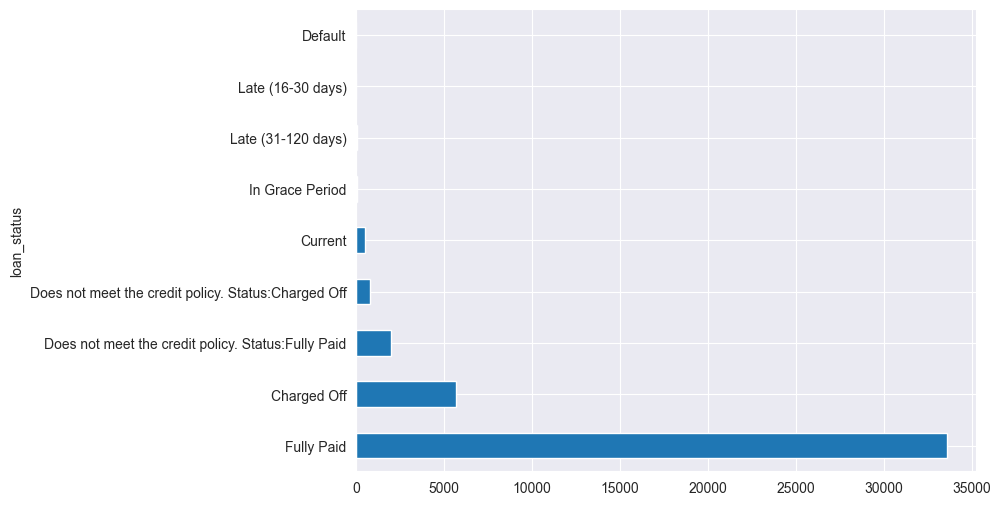

In [9]:
plt.figure(figsize=(8,6)) 
plt.ylabel("Loan Status")
plt.xlabel("Count")
loan_df["loan_status"].value_counts().plot(kind="barh",grid=True)
plt.show()

In [10]:
loan_df = loan_df[loan_df["loan_status"]!="Current"]
loan_df.dropna(subset=["loan_status"],inplace=True)
loan_df = loan_df.reset_index()
del loan_df["index"]

In [11]:
#Encoding the loan status variable
dct = {"loan_status":{ "Fully Paid": 0, "Charged Off": 1,'Does not meet the credit policy. Status:Fully Paid':1,
'Does not meet the credit policy. Status:Charged Off':1,'In Grace Period':1,'Late (31-120 days)':1 ,'Late (16-30 days)':1,'Default':1}}
loan_df = loan_df.replace(dct)

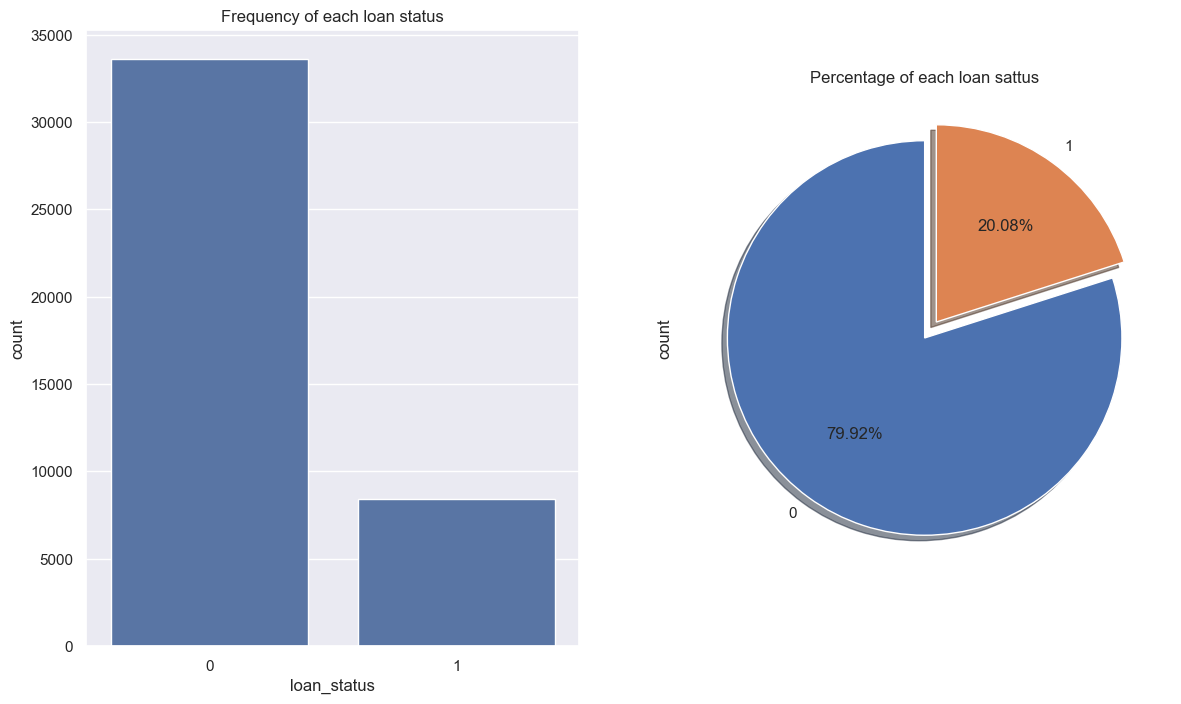

In [12]:
sns.set_theme()
fig, axs = plt.subplots(1,2,figsize=(14,8))
sns.countplot(x="loan_status",data=loan_df,ax=axs[0])
axs[0].set_title("Frequency of each loan status")
loan_df.loan_status.value_counts().plot(x=None, y=None, kind="pie", ax=axs[1],shadow=True,explode=(0,0.1),autopct="%1.2f%%",startangle=90)
axs[1].set_title("Percentage of each loan sattus")
plt.show()

In [13]:
#Droping null value from dataframe [Description DataFrame]
descr_df.dropna(inplace=True)

In [14]:
descr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  115 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


Let's check % miss Value for all feature for our loan dataframe 

#function " missing_values " calculates both the count and percentage of missing values for each column, filters out columns with no missing values, sorts the remaining columns by the percentage of missing data in descending order, and prints a summary before returning the filtered and sorted DataFrame.

In [15]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100*df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0:"Missing Values",1:'% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
            "% of Total Values",ascending=False).round(1)
    print("Dataframe has "+ str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values .")
    return mis_val_table_ren_columns

In [16]:
# Missing Values Statistics
miss_values = missing_values(loan_df)
miss_values.head()

Dataframe has 115 columns.
There are 77 columns that have missing values .


Missing Values  % of Total Values
total_cu_tl                              42022              100.0
total_rev_hi_lim                         42022              100.0
num_accts_ever_120_pd                    42022              100.0
mths_since_recent_revol_delinq           42022              100.0
mths_since_recent_inq                    42022              100.0

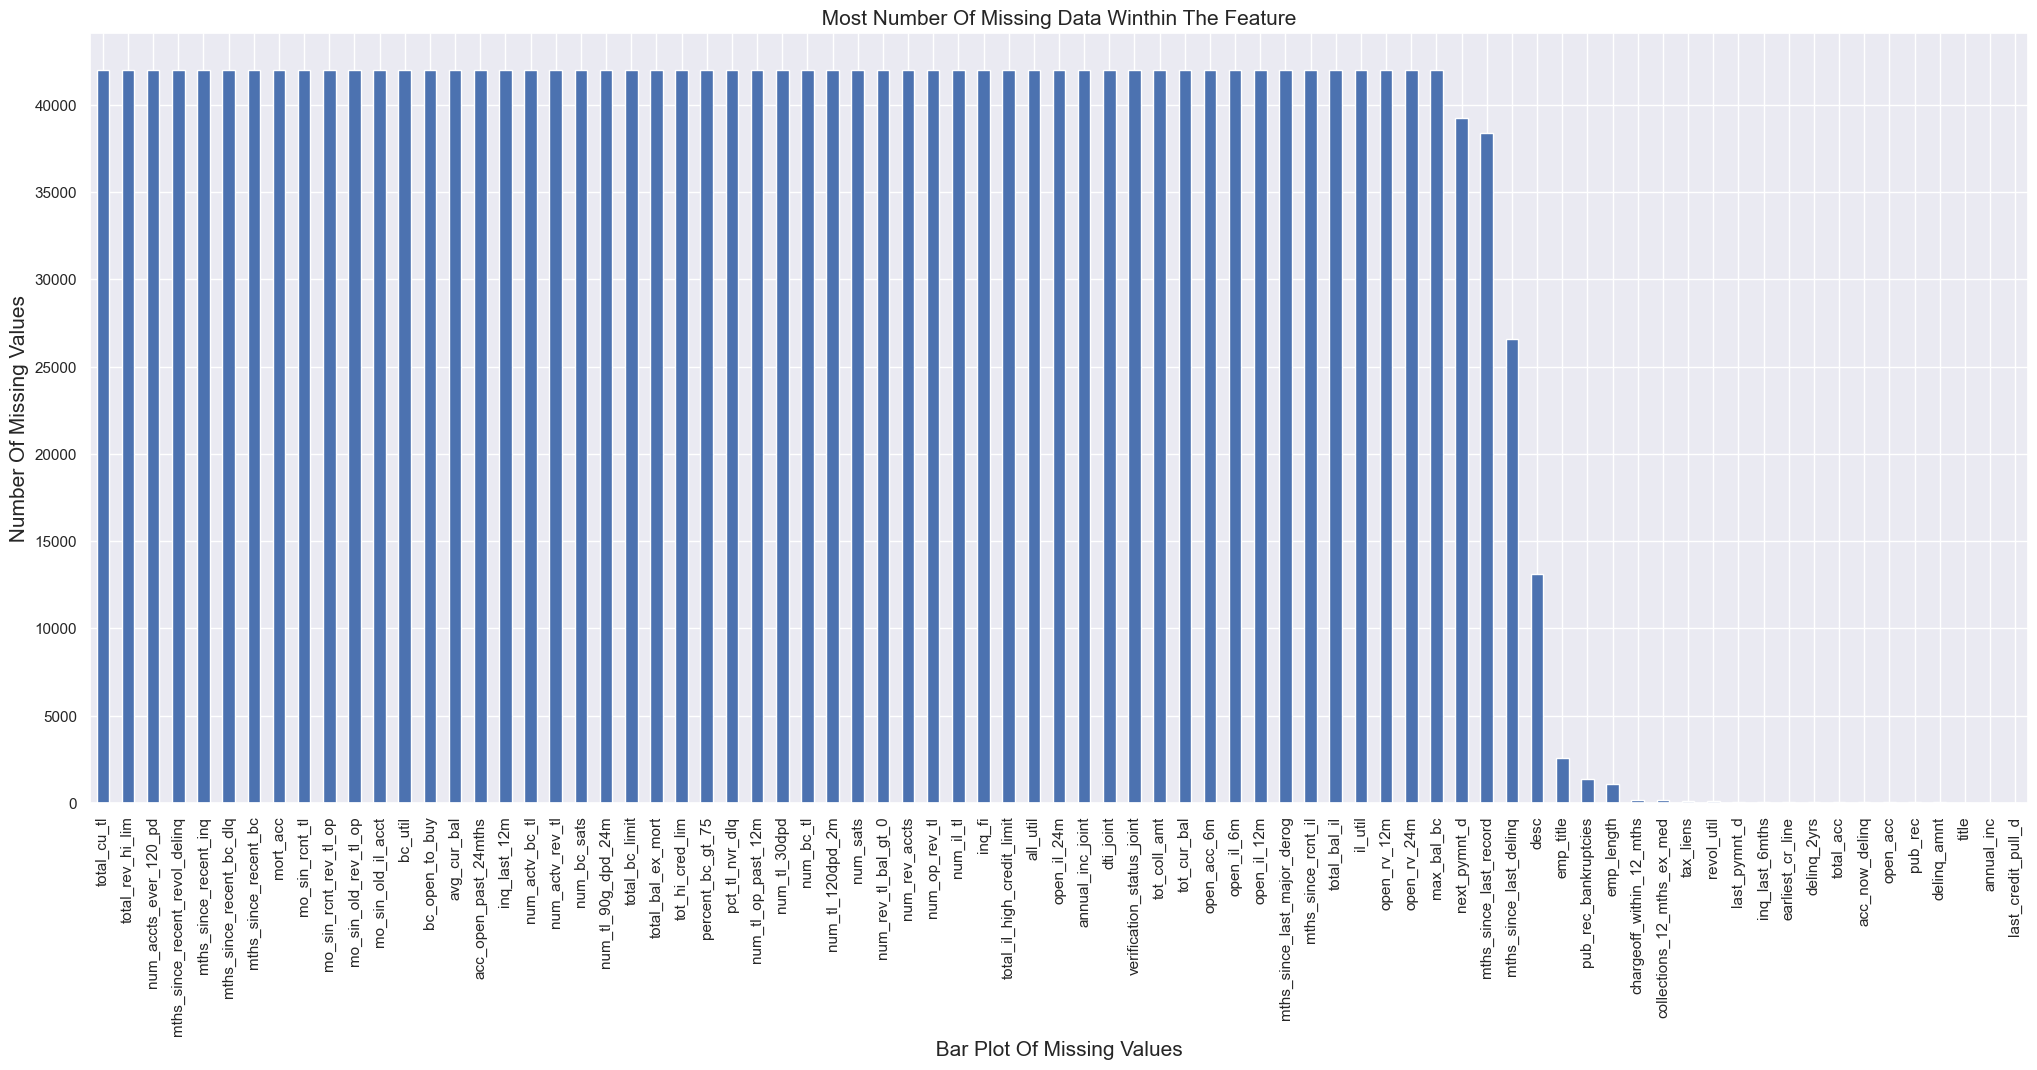

In [17]:
plt.figure(figsize=(25,10))

# Calculate the number of missing values in each column
missing = loan_df.isnull().sum()

missing = missing[missing > 0]
missing.sort_values(ascending=False, inplace=True)
plt.xlabel(" Bar Plot Of Missing Values ", fontsize = 15)
plt.ylabel(" Number Of Missing Values ", fontsize = 15)
plt.title(" Most Number Of Missing Data Winthin The Feature ", fontsize = 15)

# Plot the first 80 columns with missing values as a bar plot
missing[:80].plot(kind="bar")

plt.show()

In [18]:
# Droping Columns Which Has MIssing Values More than 90%
columns = [column for column in loan_df.count() < 42022*0.10] 
loan_df.drop(loan_df.columns[columns],axis=1,inplace=True)

In [19]:
# Missing values statistics
miss_values = missing_values(loan_df)
miss_values.head()


Dataframe has 59 columns.
There are 21 columns that have missing values .


Missing Values  % of Total Values
mths_since_last_delinq           26569               63.2
desc                             13108               31.2
emp_title                         2589                6.2
pub_rec_bankruptcies              1365                3.2
emp_length                        1093                2.6

Now Our dataframe has only 21 columns which has missing value

Let’s see is there any features that contain only one unique value? 

If yes, We can remove them because that feature is redundant for all the
record.

In [20]:
redundant_columns = list(loan_df.loc[:,loan_df.apply(pd.Series.nunique)==1].columns)
len(redundant_columns)

5

In [21]:
# Filter the DataFrame to keep only columns with more than one unique value
loan_df = loan_df.loc[:,loan_df.apply(pd.Series.nunique) != 1]

# Now loan_df contains only the columns that have more than one unique value

In [22]:
#missing values statistics
miss_values = missing_values(loan_df)

Dataframe has 54 columns.
There are 19 columns that have missing values .


In [23]:
#NUMERICAL FEATURES ANALYSIS

numeric_ls = list(loan_df.describe().columns.to_list())
loan_df[numeric_ls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42022 entries, 0 to 42021
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                42022 non-null  float64
 1   loan_amnt                42022 non-null  float64
 2   funded_amnt              42022 non-null  float64
 3   funded_amnt_inv          42022 non-null  float64
 4   installment              42022 non-null  float64
 5   annual_inc               42018 non-null  float64
 6   loan_status              42022 non-null  int64  
 7   dti                      42022 non-null  float64
 8   delinq_2yrs              41993 non-null  float64
 9   fico_range_low           42022 non-null  float64
 10  fico_range_high          42022 non-null  float64
 11  inq_last_6mths           41993 non-null  float64
 12  mths_since_last_delinq   15453 non-null  float64
 13  open_acc                 41993 non-null  float64
 14  pub_rec               

In [24]:
loan_df[numeric_ls].head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv  installment  \
0  1296599.0     5000.0       5000.0           4975.0       162.87   
1  1314167.0     2500.0       2500.0           2500.0        59.83   
2  1313524.0     2400.0       2400.0           2400.0        84.33   
3  1277178.0    10000.0      10000.0          10000.0       339.31   
4  1311441.0     5000.0       5000.0           5000.0       156.46   

   annual_inc  loan_status    dti  delinq_2yrs  fico_range_low  ...  \
0     24000.0            0  27.65          0.0           735.0  ...   
1     30000.0            1   1.00          0.0           740.0  ...   
2     12252.0            0   8.72          0.0           735.0  ...   
3     49200.0            0  20.00          0.0           690.0  ...   
4     36000.0            0  11.20          0.0           730.0  ...   

   total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  \
0                0.00        0.00                     0.00           171.62   
1                0.00      117.08                     1.11           119.66   
2                0.00        0.00                     0.00           649.91   
3               16.97        0.00                     0.00           357.48   
4                0.00        0.00                     0.00           161.03   

   last_fico_range_high  last_fico_range_low  acc_now_delinq  delinq_amnt  \
0                 744.0                740.0             0.0          0.0   
1                 499.0                  0.0             0.0          0.0   
2                 719.0                715.0             0.0          0.0   
3                 604.0                600.0             0.0          0.0   
4                 679.0                675.0             0.0          0.0   

   pub_rec_bankruptcies  tax_liens  
0                   0.0        0.0  
1                   0.0        0.0  
2                   0.0        0.0  
3                   0.0        0.0  
4                   0.0        0.0  

[5 rows x 33 columns]

In [25]:
#missing values statistics
miss_values = missing_values(loan_df[numeric_ls])

Dataframe has 33 columns.
There are 11 columns that have missing values .


We can drop below column as this is not having any information because it's primary key of columns and it's unique for all the record

member_id:-A unique LC assigned Id for the borrower member.

We can drop below features because it's not provided by customer and they can be future leak.

funded_amnt:-The total amount committed to that loan at that point in time.
funded_amnt_inv:-The total amount committed by investors for that loan at that point in time.

In [26]:
redundant_columns = ["member_id","funded_amnt", "funded_amnt_inv"]
redundant_columns

['member_id', 'funded_amnt', 'funded_amnt_inv']

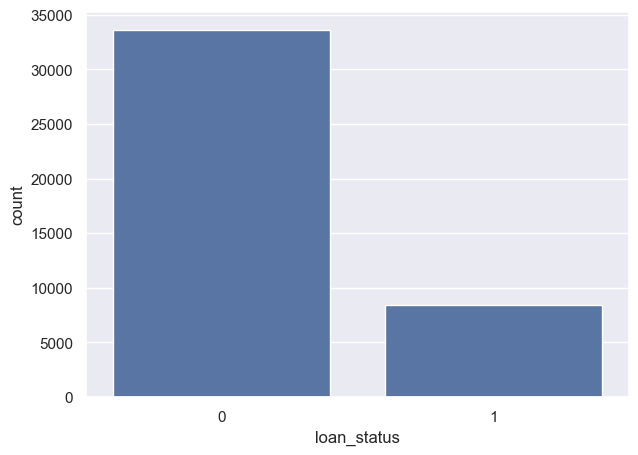

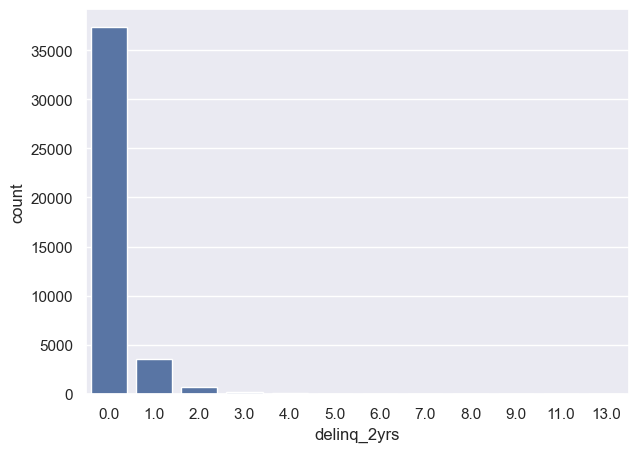

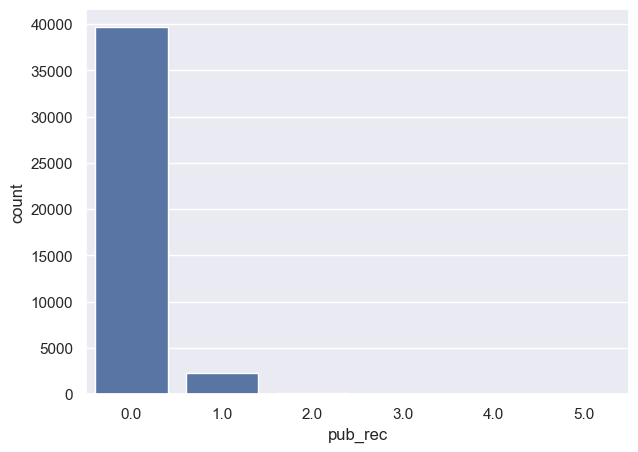

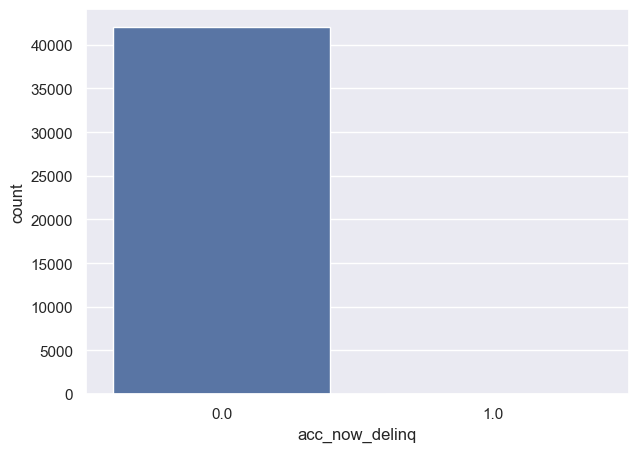

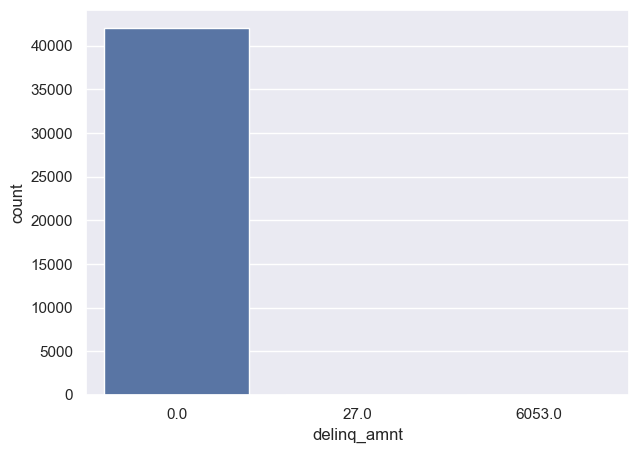

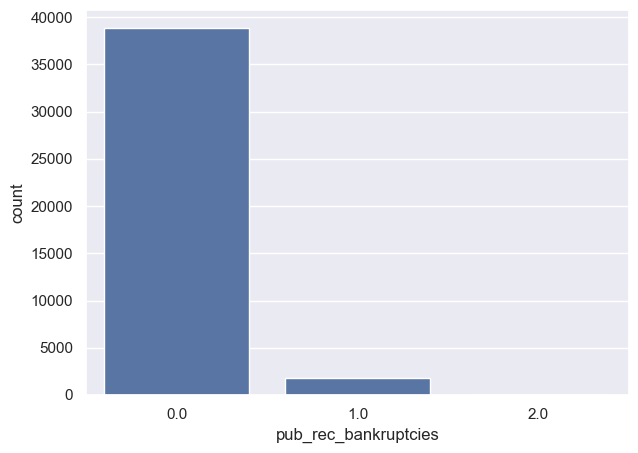

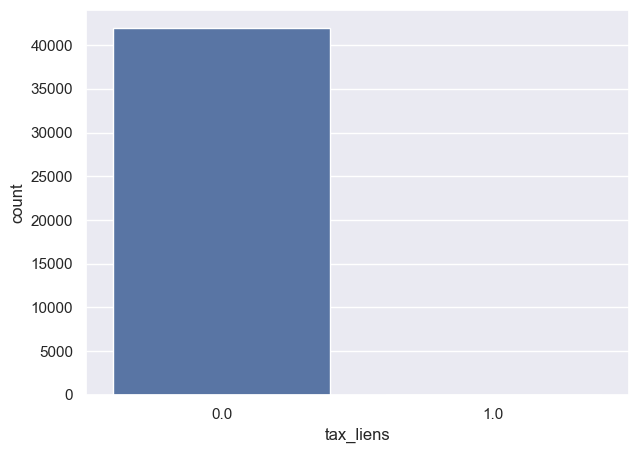

In [27]:
for column in numeric_ls:
    if loan_df[column].nunique() < 14:
        plt.figure(figsize=(7,5))
        sns.countplot(x=column,data=loan_df[numeric_ls])
        #plt.legend()
        plt.show()

we can see some column contain single observation so we need to drop them.

As we can see from unique counts feature "tax_liens, acc_now_delinq, delinq_amnt" have only 1 unique value counts so we can drop these columns

In [28]:
redundant_columns.append("tax_liens")
redundant_columns.append("acc_now_delinq")
redundant_columns.append("delinq_amnt")
redundant_columns

['member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'tax_liens',
 'acc_now_delinq',
 'delinq_amnt']

Below columns are the leaks data from the future , so we should drop it from our dataset

total_pymnt:-Payments received to date for total amount funded.
total_pymnt_inv:-Payments received to date for portion of total amount funded by investors.
total_rec_prncp:-Principal received to date.
total_rec_int:-Interest received to date.
total_rec_late_fee:-Late fees received to date.
recoveries:-post charge off gross recovery.
collection_recovery_fee:-post charge off collection fee.
last_pymnt_d:-Last month payment was received.
last_pymnt_amnt:-Last total payment amount received.

In [ ]:
redundant_columns.extend(['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','out_prncp','out_prncp_inv','last_pymnt_amnt'])
print(redundant_columns)

['member_id', 'funded_amnt', 'funded_amnt_inv', 'tax_liens', 'acc_now_delinq', 'delinq_amnt', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'out_prncp', 'out_prncp_inv', 'last_pymnt_amnt']


In [30]:
numeric_ls = list(set(numeric_ls)-set(redundant_columns))
print(numeric_ls)

['pub_rec_bankruptcies', 'open_acc', 'last_fico_range_low', 'dti', 'loan_amnt', 'delinq_2yrs', 'fico_range_low', 'loan_status', 'fico_range_high', 'revol_bal', 'inq_last_6mths', 'pub_rec', 'last_fico_range_high', 'annual_inc', 'total_acc', 'installment', 'mths_since_last_delinq']


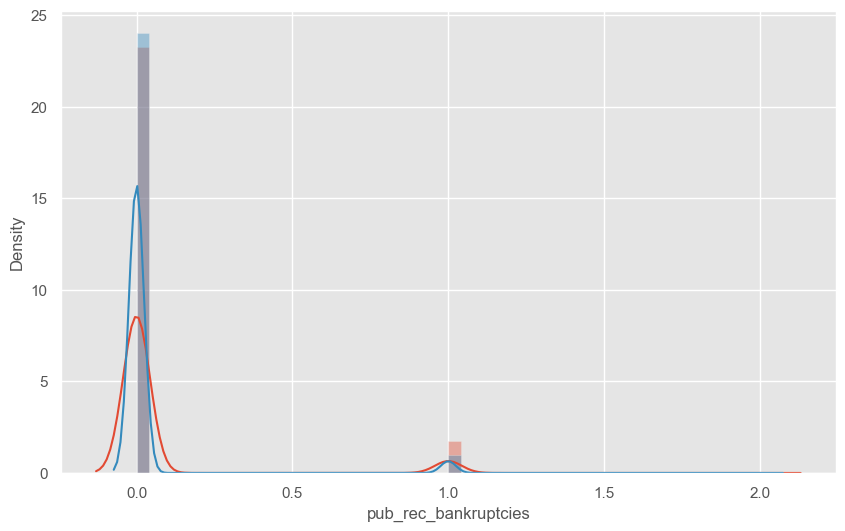

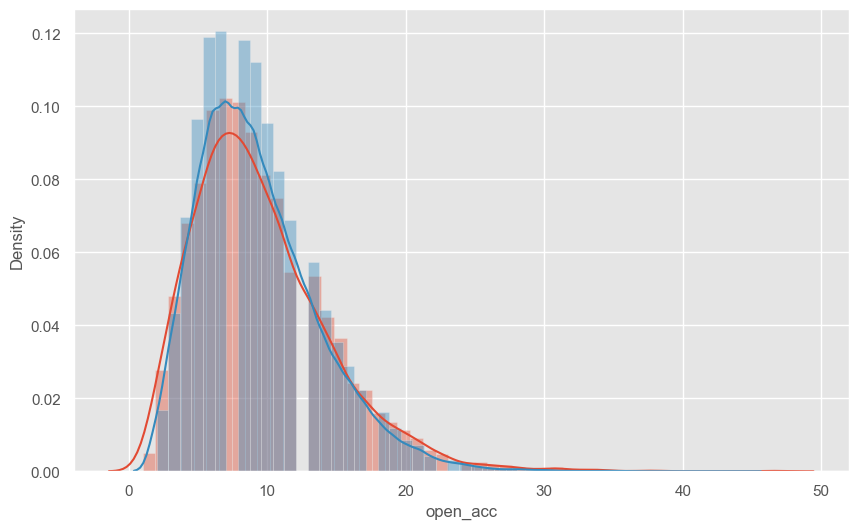

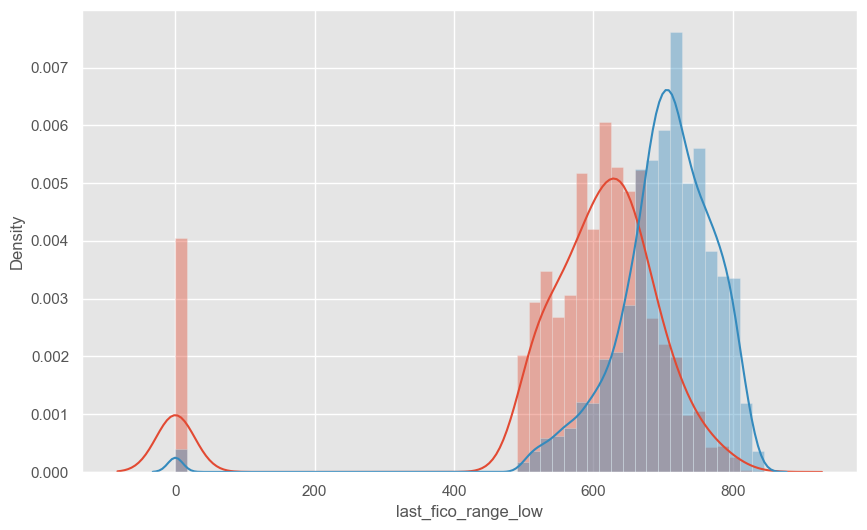

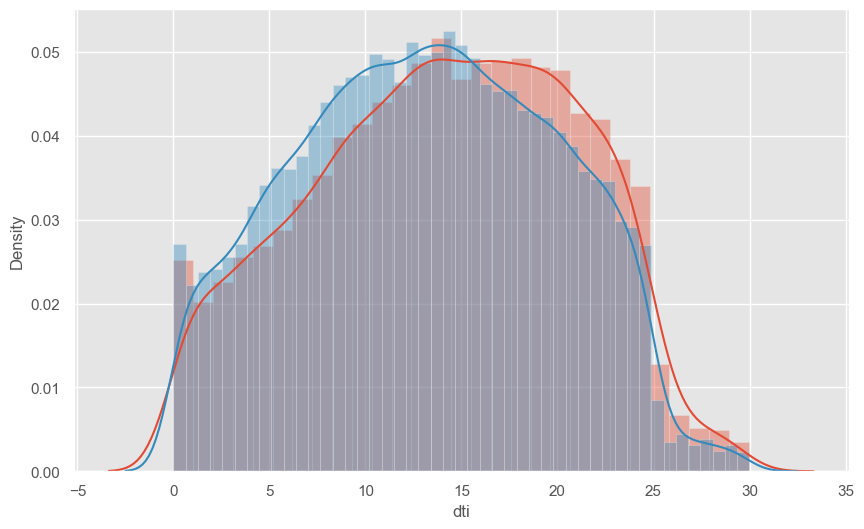

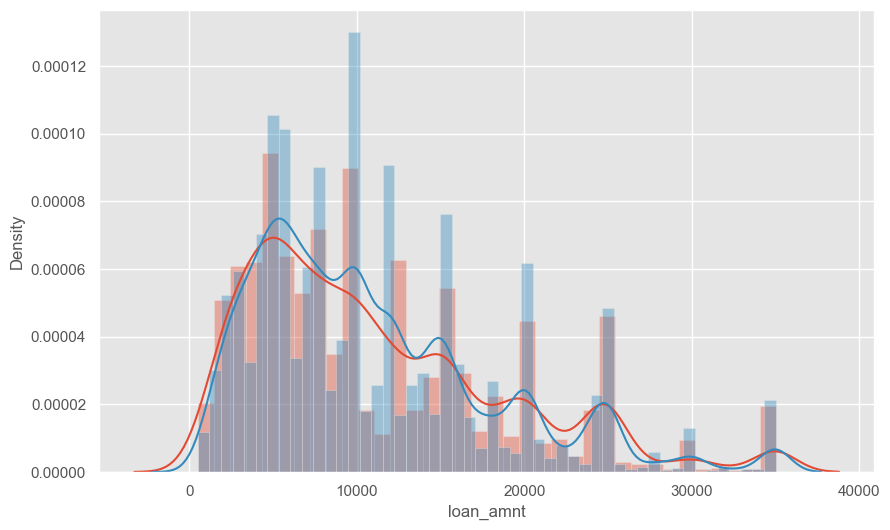

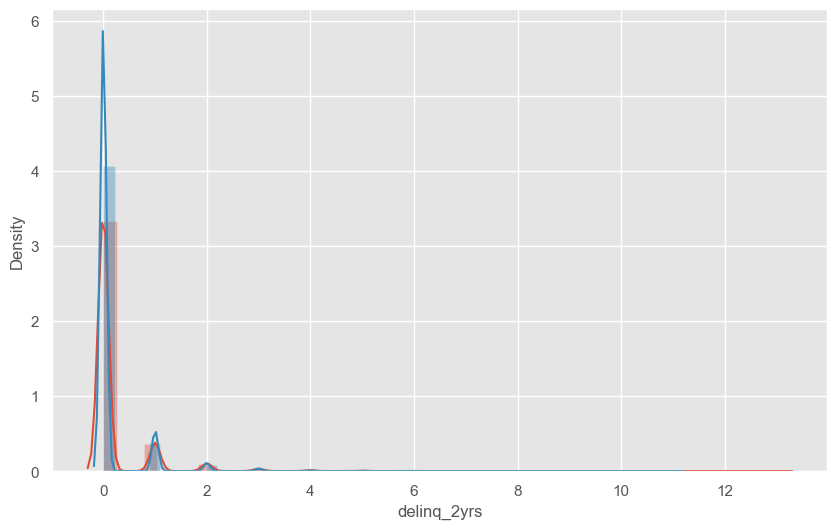

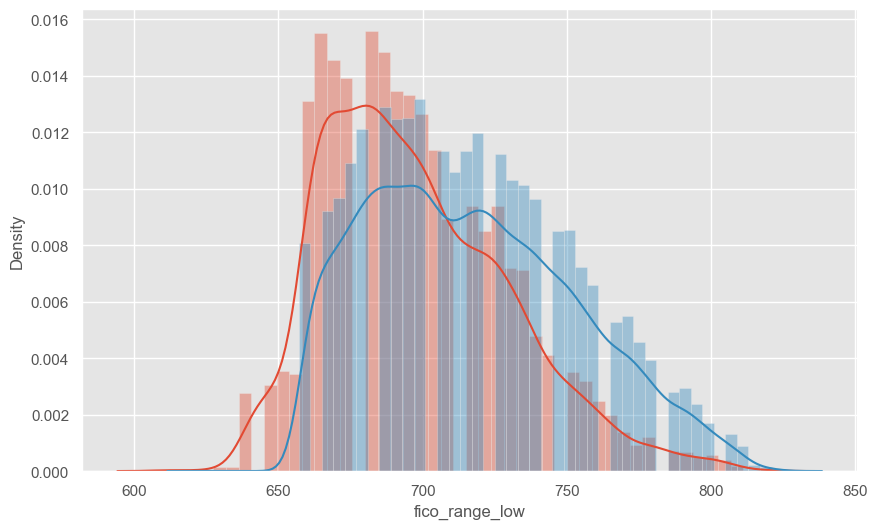

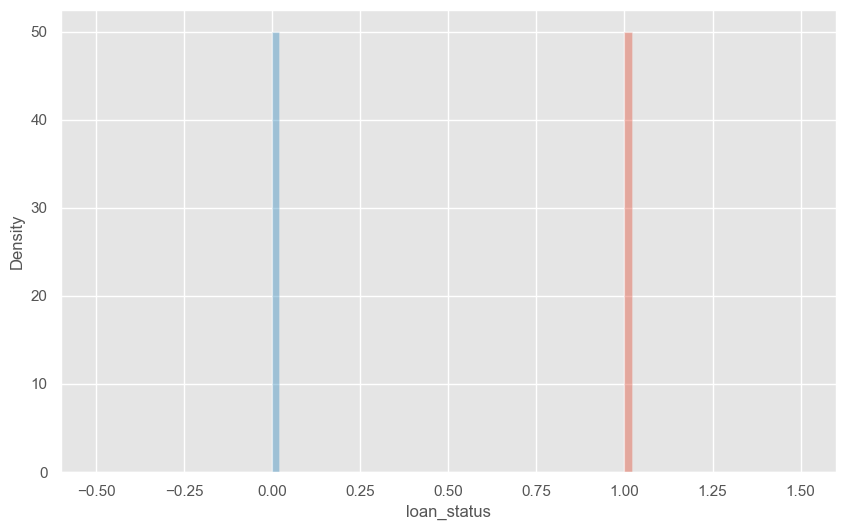

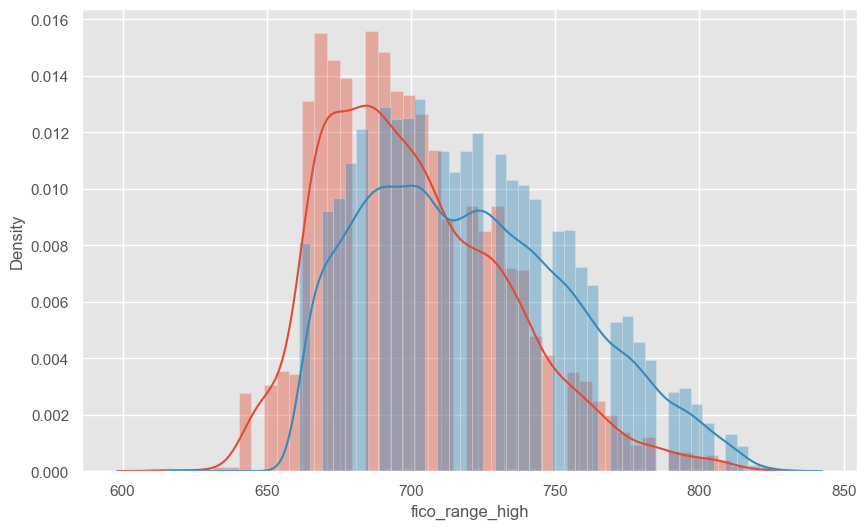

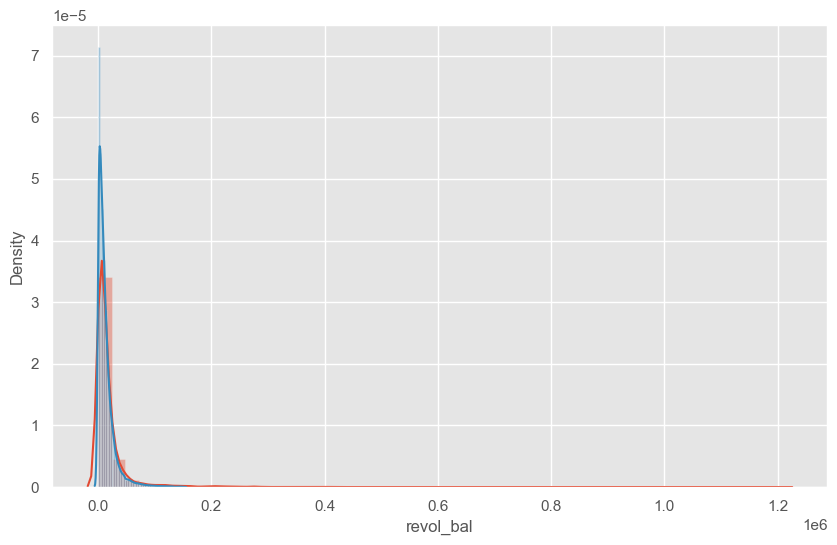

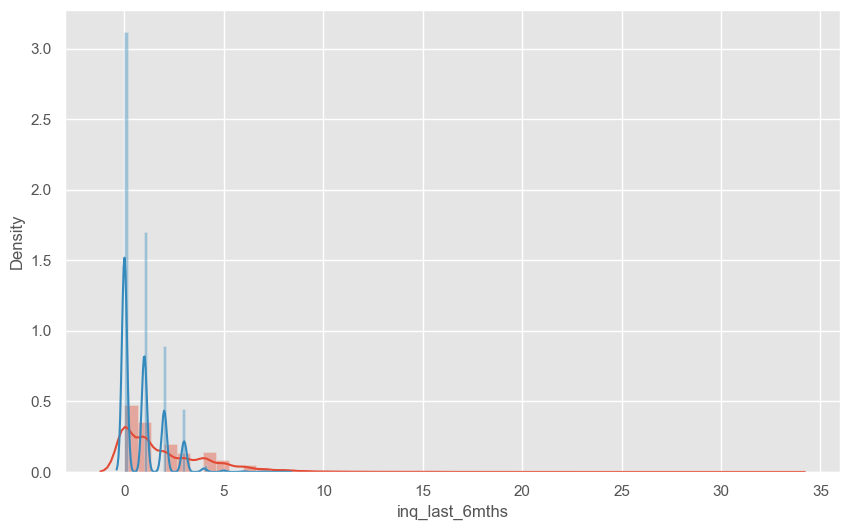

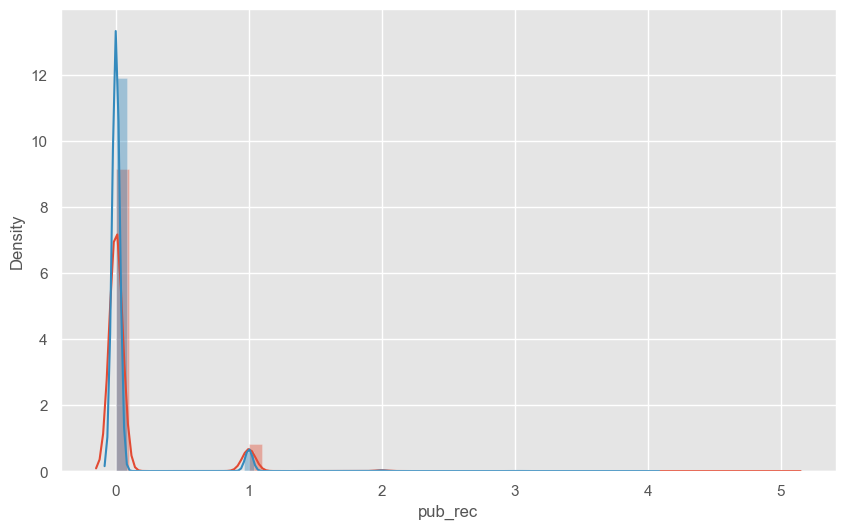

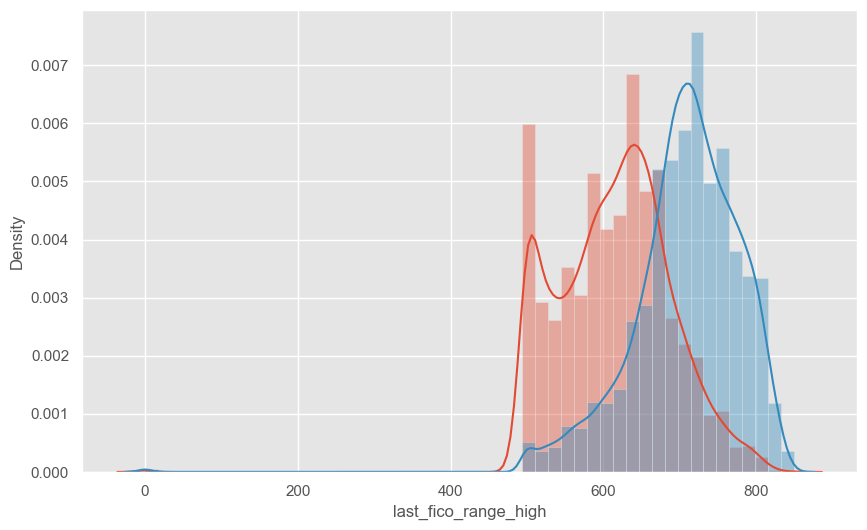

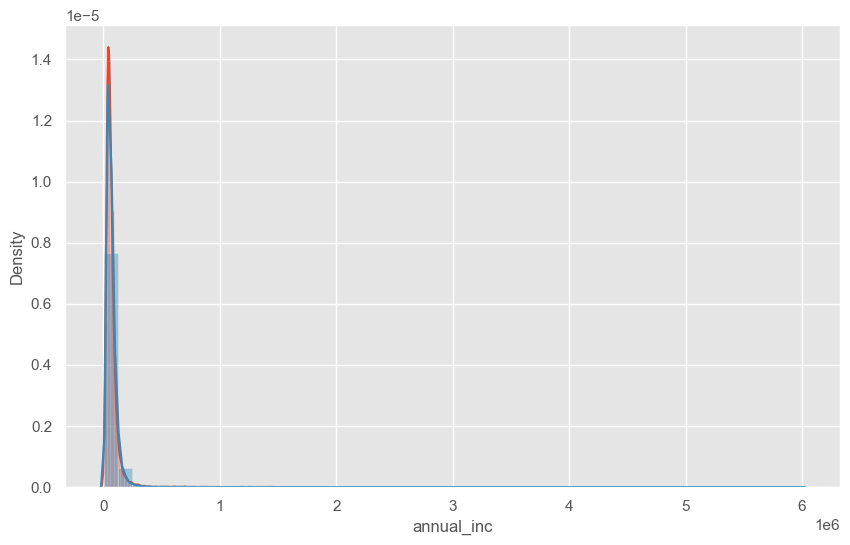

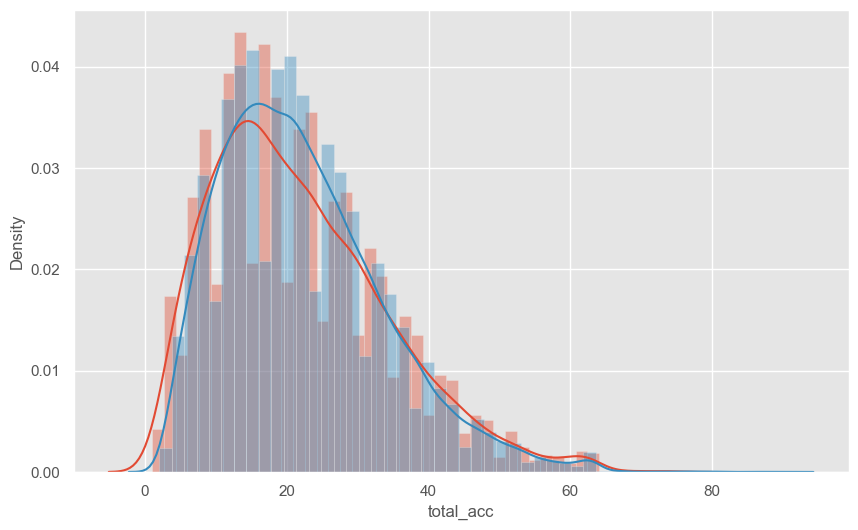

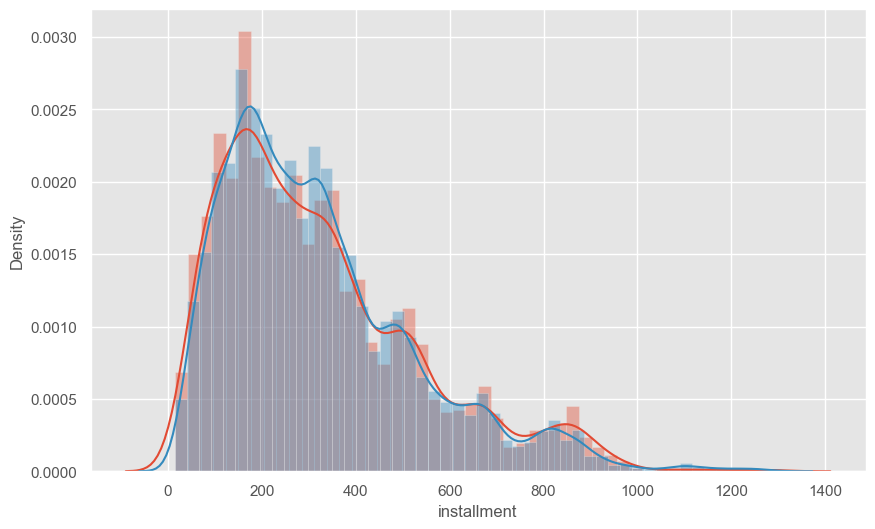

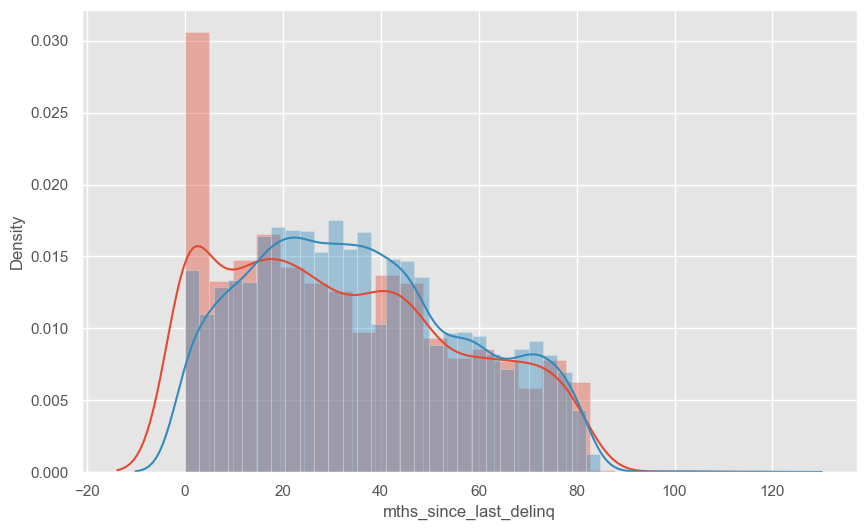

In [31]:
# let's see the trend of all the feature with target variable
plt.style.use('ggplot')
for col in loan_df[numeric_ls].columns:
    fig = plt.figure(figsize=(10,6))
    plt.style.use('ggplot')
    sns.distplot(loan_df[numeric_ls].loc[loan_df['loan_status']==1,col],label='loan_status 1')
    sns.distplot(loan_df[numeric_ls].loc[loan_df['loan_status'] == 0,col],label='loan_status 0')
    plt.legend
    plt.show()

The density of interest rates follow kind of a Normal distribution with more density on interest rates between 12%-18%.

So we can see that annaul_inc is a skewd distribution so wee ned impliment outliar treatment on this.

we can see that intrate, installment and funded amount follow similar type distribution.

In [32]:
loan_df[numeric_ls].head()

pub_rec_bankruptcies  open_acc  last_fico_range_low    dti  loan_amnt  \
0                   0.0       3.0                740.0  27.65     5000.0   
1                   0.0       3.0                  0.0   1.00     2500.0   
2                   0.0       2.0                715.0   8.72     2400.0   
3                   0.0      10.0                600.0  20.00    10000.0   
4                   0.0       9.0                675.0  11.20     5000.0   

   delinq_2yrs  fico_range_low  loan_status  fico_range_high  revol_bal  \
0          0.0           735.0            0            739.0    13648.0   
1          0.0           740.0            1            744.0     1687.0   
2          0.0           735.0            0            739.0     2956.0   
3          0.0           690.0            0            694.0     5598.0   
4          0.0           730.0            0            734.0     7963.0   

   inq_last_6mths  pub_rec  last_fico_range_high  annual_inc  total_acc  \
0             1.0      0.0                 744.0     24000.0        9.0   
1             5.0      0.0                 499.0     30000.0        4.0   
2             2.0      0.0                 719.0     12252.0       10.0   
3             1.0      0.0                 604.0     49200.0       37.0   
4             3.0      0.0                 679.0     36000.0       12.0   

   installment  mths_since_last_delinq  
0       162.87                     NaN  
1        59.83                     NaN  
2        84.33                     NaN  
3       339.31                    35.0  
4       156.46                     NaN

<Axes: >

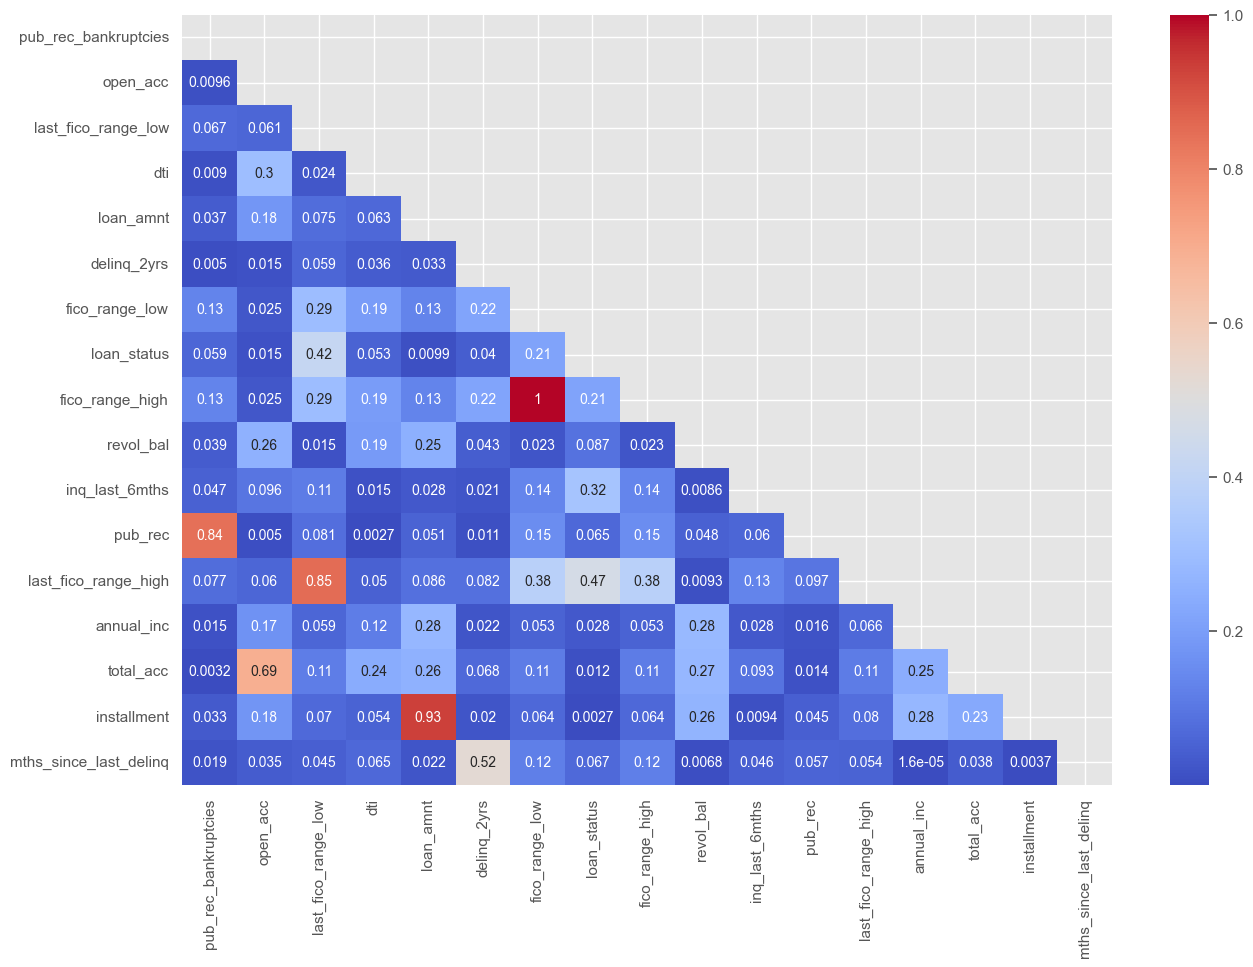

In [33]:
plt.figure(figsize=(15,10))
cor = loan_df[numeric_ls].corr().abs()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor , mask=mask , annot=True , cmap='coolwarm')

In [ ]:
loan_df[['fico_range_high','fico_range_low']].corr()

fico_range_high  fico_range_low
fico_range_high              1.0             1.0
fico_range_low               1.0             1.0

Taking The Average Fico Length Since the are highly Correlated.Interpreting Same thing

In [35]:
loan_df['fico_range_avg'] = (loan_df['fico_range_high']+loan_df['fico_range_low'])

In [36]:
redundant_columns.extend(['fico_range_low','fico_range_high'])
numeric_ls = list(set(numeric_ls)-set(redundant_columns))

We have done with Numerical data Analysis.

Categorical Data Analysis

In [37]:
categorical_ls = list(set(loan_df.columns.to_list())-set(loan_df.describe().columns.to_list()))
loan_df[categorical_ls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42022 entries, 0 to 42021
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   pymnt_plan           42022 non-null  object
 1   addr_state           42022 non-null  object
 2   last_credit_pull_d   42018 non-null  object
 3   grade                42022 non-null  object
 4   int_rate             42022 non-null  object
 5   emp_length           40929 non-null  object
 6   sub_grade            42022 non-null  object
 7   earliest_cr_line     41993 non-null  object
 8   home_ownership       42022 non-null  object
 9   last_pymnt_d         41939 non-null  object
 10  term                 42022 non-null  object
 11  emp_title            39433 non-null  object
 12  zip_code             42022 non-null  object
 13  url                  42022 non-null  object
 14  issue_d              42022 non-null  object
 15  verification_status  42022 non-null  object
 16  titl

In [38]:
miss_values = missing_values(loan_df[categorical_ls])

Dataframe has 21 columns.
There are 8 columns that have missing values .


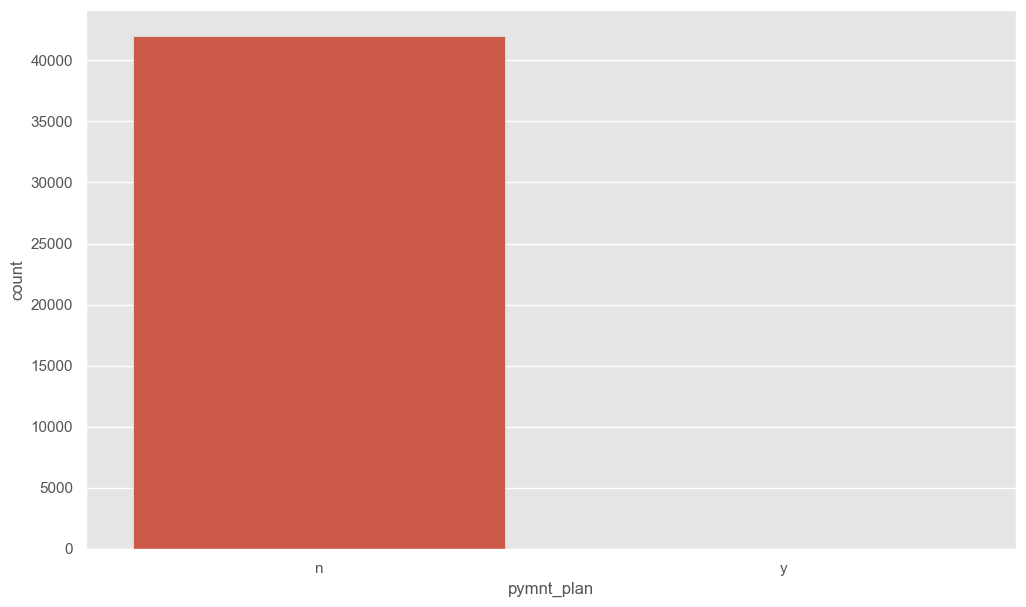

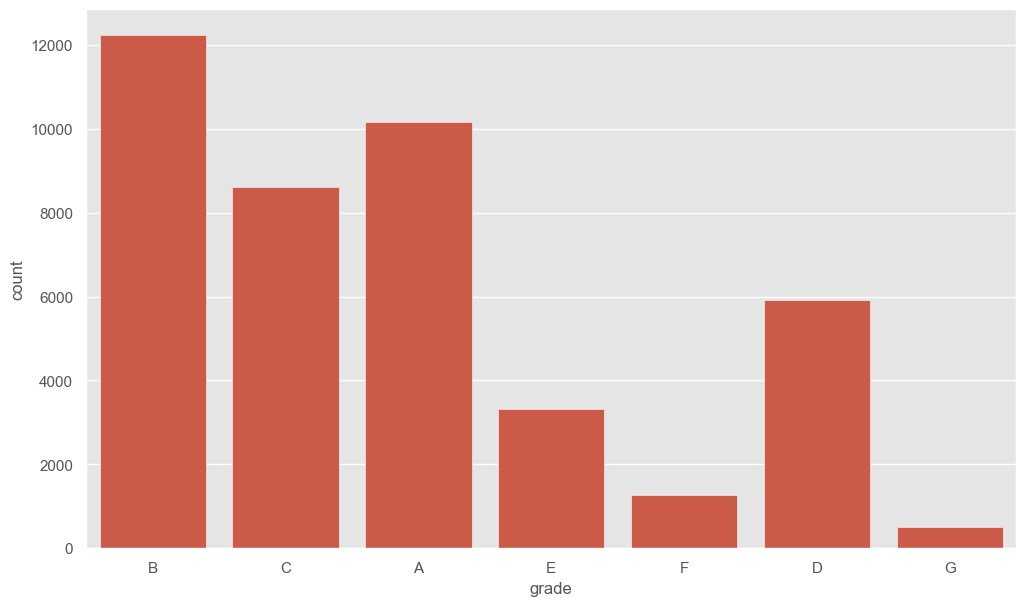

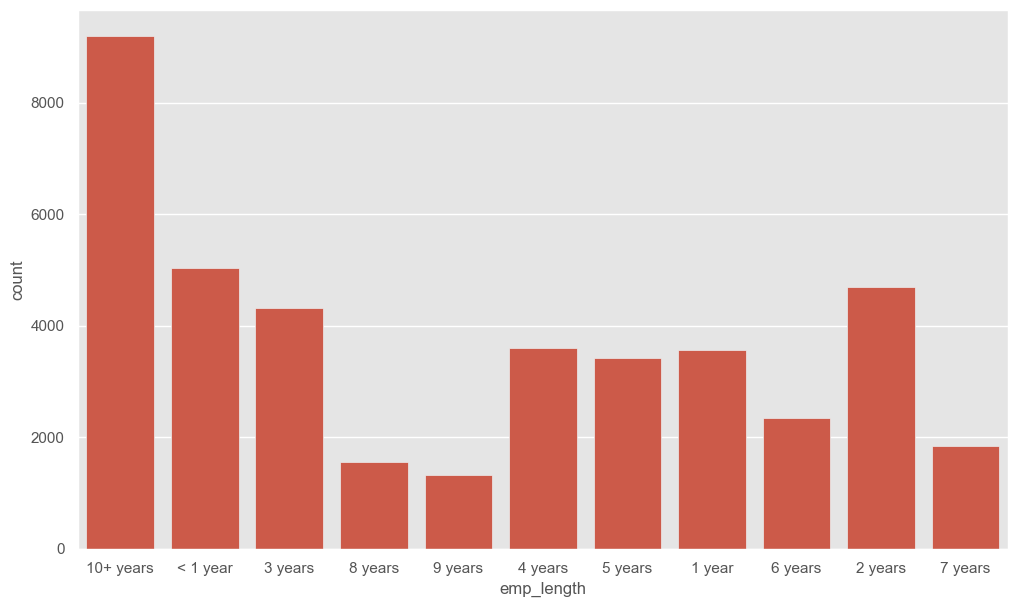

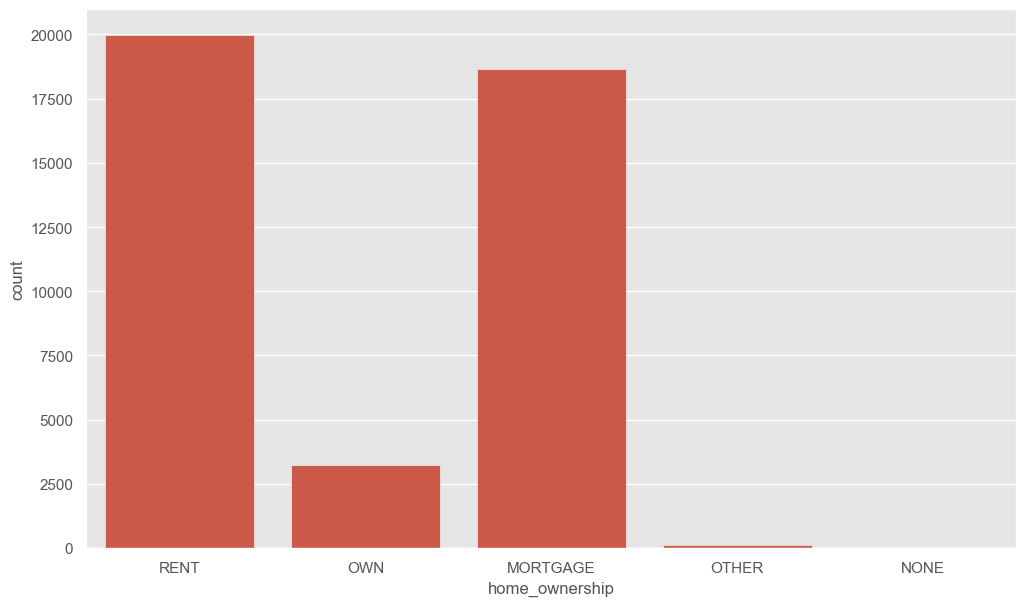

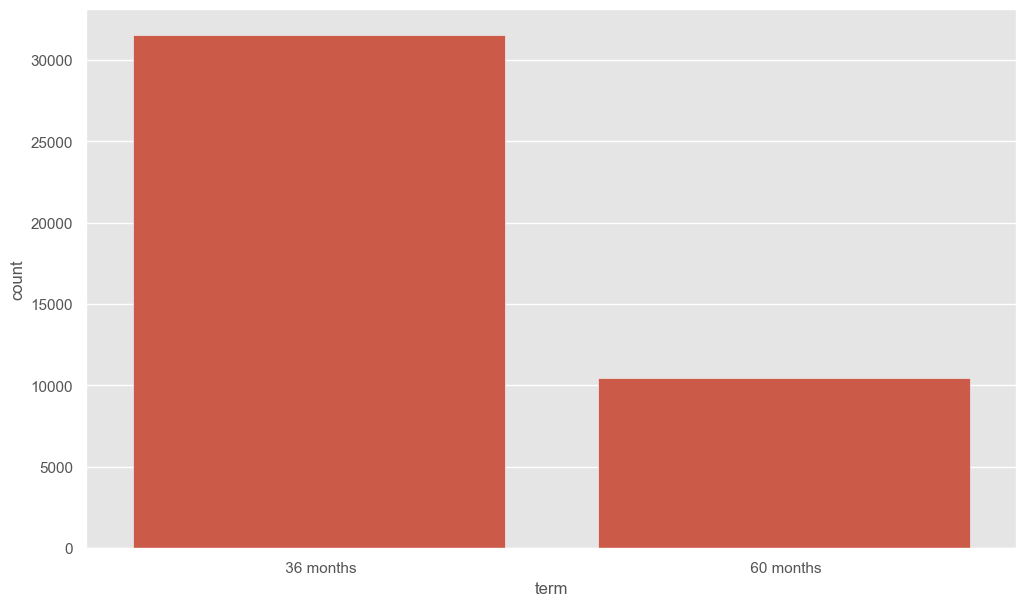

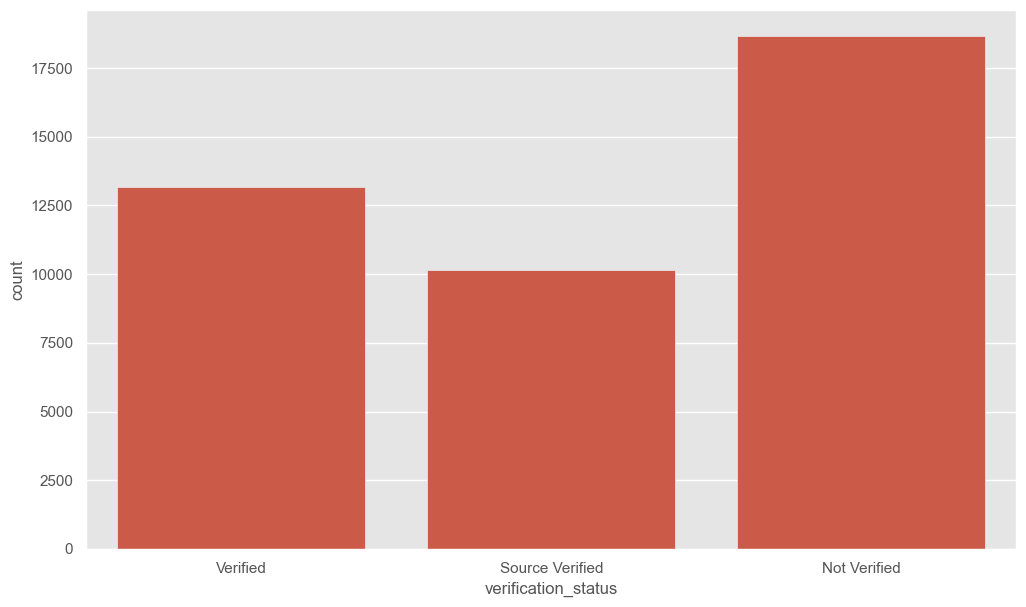

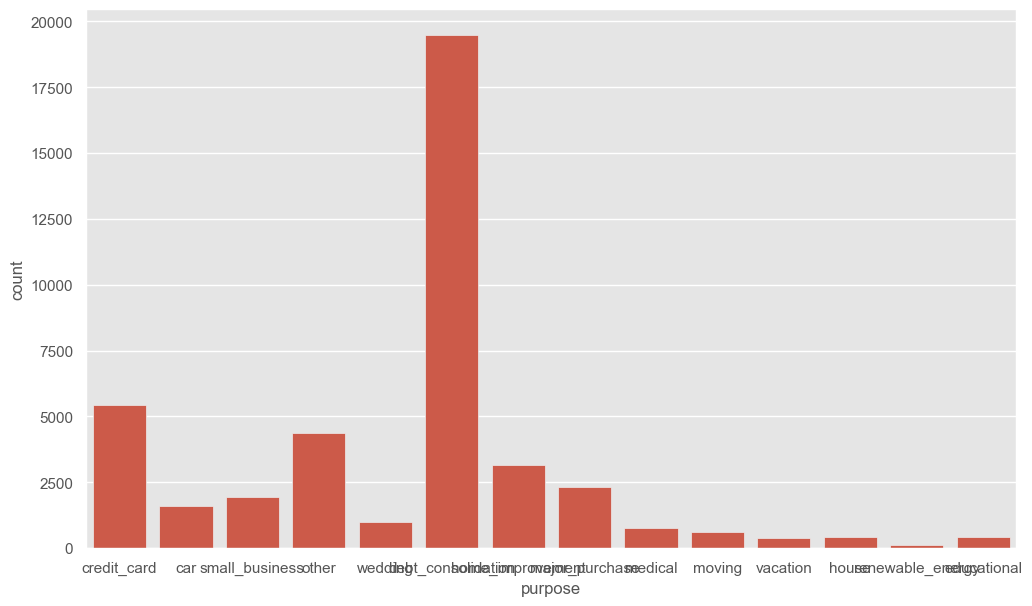

In [39]:
plt.style.use('ggplot')
for column in categorical_ls:
    if loan_df[column].nunique() < 25:
        plt.figure(figsize=(12,7))
        sns.countplot(x=column , data=loan_df[categorical_ls])
        plt.show()

In [40]:
#These Informations Are Not Available When Loan Application is received.
#leak data from future.

redundant_columns.extend(['last_pymnt_d','issue_d'])

In [41]:
#Single Or Non Unique Value Contaning Data Points are Not usefull for prediction
#All values are diffrent for these columns there is no pattern or any thing intutive

redundant_columns.extend(['url','title','emp_title','pymnt_plan','desc','id'])

Changing Object Type feature to integer type features

In [42]:
categorical_ls = list(set(categorical_ls)-set(redundant_columns))

In [43]:
loan_df['term'] = loan_df['term'].replace("months","",regex=True).astype(int)
loan_df['emp_length'].replace(to_replace='[^0-9]+',value="",inplace=True,regex=True)
loan_df['emp_length'] = loan_df['emp_length'].astype(float)

In [44]:
loan_df['int_rate'] = loan_df['int_rate'].replace("%","",regex=True).astype(float)

In [45]:
label_encod = ['purpose','zip_code']

In [46]:
loan_df['earliest_cr_line']

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
4        Nov-04
          ...  
42017       NaN
42018       NaN
42019       NaN
42020       NaN
42021       NaN
Name: earliest_cr_line, Length: 42022, dtype: object

In [47]:
loan_df['earliest_cr_line']=loan_df['earliest_cr_line'].fillna('Aug-01')

In [48]:
loan_df['earliest_cr_line']

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
4        Nov-04
          ...  
42017    Aug-01
42018    Aug-01
42019    Aug-01
42020    Aug-01
42021    Aug-01
Name: earliest_cr_line, Length: 42022, dtype: object

In [49]:
# #As it's an object type we can take only year and month feature from it
loan_df['earliest_cr_line_month'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y', errors='coerce').dt.month
loan_df['earliest_cr_line_year'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y', errors='coerce').dt.year
redundant_columns.append('earliest_cr_line')

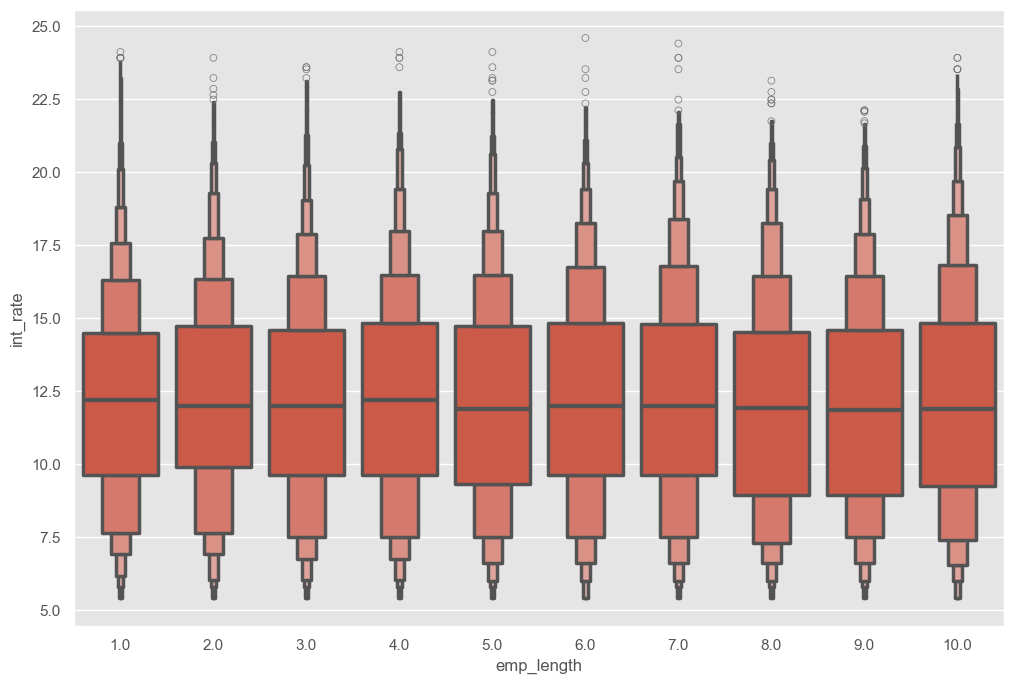

In [50]:
plt.figure(figsize=(12,8))
ax = sns.boxenplot(x="emp_length",y="int_rate",data=loan_df,linewidth=2.5)
plt.show()

<Axes: xlabel='earliest_cr_line_month', ylabel='count'>

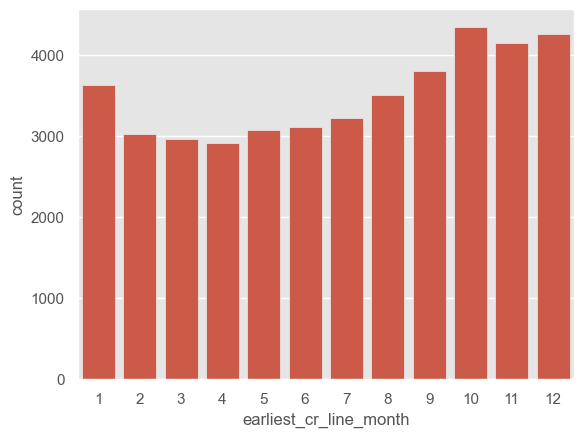

In [51]:
# We can see that emp_length is similar for every intrest or vise versa
sns.countplot(x="earliest_cr_line_month",data=loan_df)

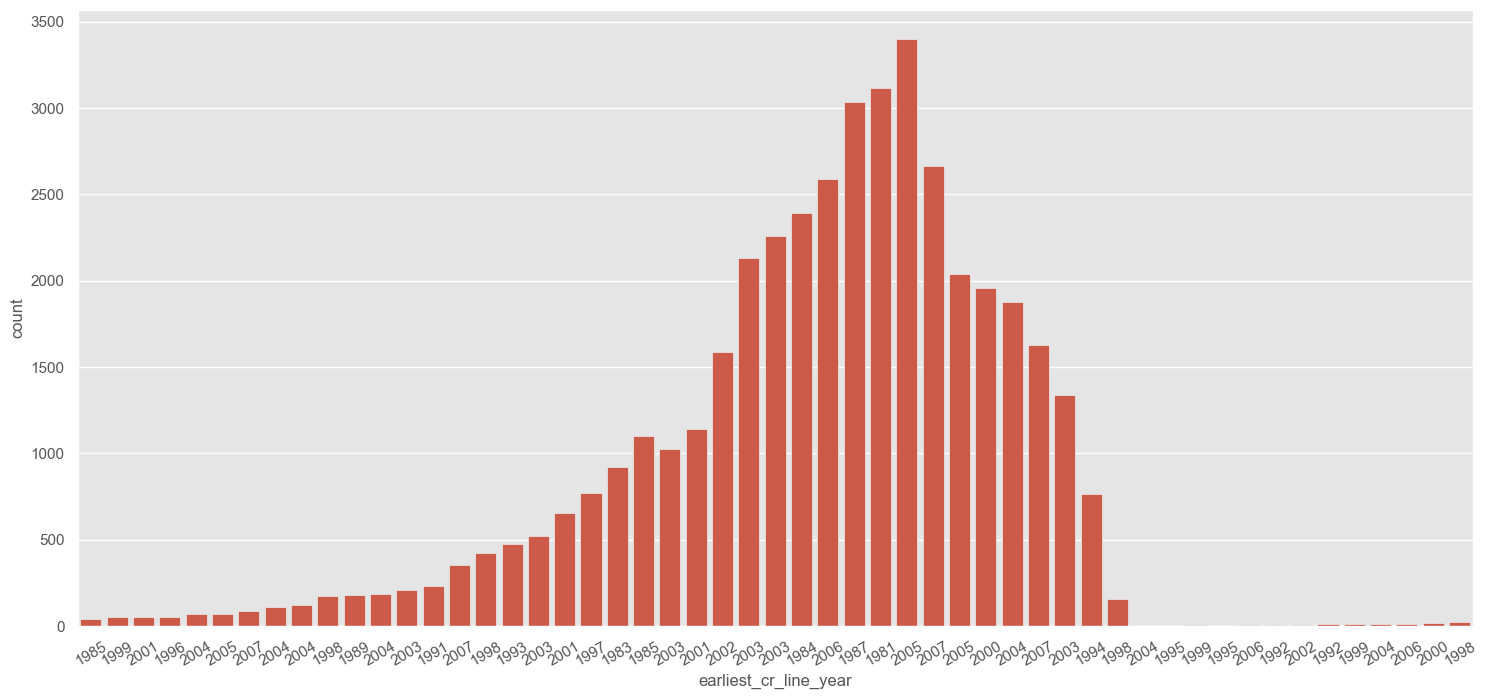

In [52]:
plt.figure(figsize=(18,8))
g=sns.countplot(x="earliest_cr_line_year",data=loan_df).set_xticklabels(labels=loan_df['earliest_cr_line_year'],rotation=30)

In [53]:
loan_df['last_credit_pull_d']

0        Sep-16
1        Sep-16
2        Sep-16
3        Apr-16
4        Jan-16
          ...  
42017    Feb-13
42018    Sep-14
42019    May-07
42020    Aug-07
42021    Feb-15
Name: last_credit_pull_d, Length: 42022, dtype: object

In [54]:
loan_df['last_credit_pull_d']=loan_df['last_credit_pull_d'].fillna('Sep-16')

In [55]:
#As it's an object type we can take only year and month feature from it
loan_df['last_credit_pull_d_month'] = pd.to_datetime(loan_df['last_credit_pull_d'], format='%b-%y').apply(lambda x: int(x.strftime('%m')))
loan_df['last_credit_pull_d_year'] = pd.to_datetime(loan_df['last_credit_pull_d'], format='%b-%y').apply(lambda x: int(x.strftime('%Y')))
redundant_columns.append('last_credit_pull_d')

<Axes: xlabel='last_credit_pull_d_month', ylabel='count'>

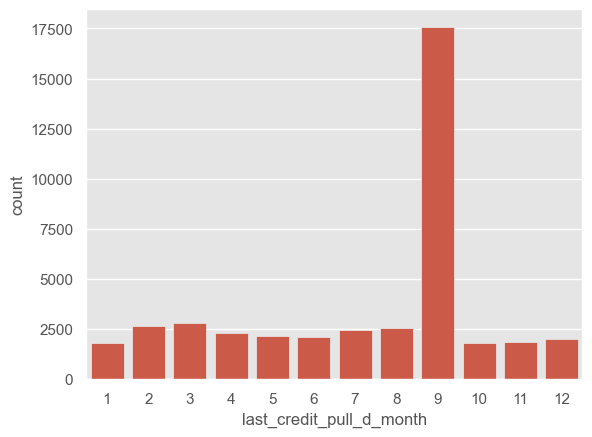

In [56]:
sns.countplot(x='last_credit_pull_d_month',data=loan_df)

In [57]:
one_hot_coding = ['home_ownership']
redundant_columns.append('verification_status')

In [58]:
label_encod.append('grade')
label_encod.append('sub_grade')
label_encod.append('addr_state')

Revolving balance :
In credit card terms, a revolving balance is the portion of credit card spending that goes unpaid at the end of a billing cycle. The amount can vary, going up or down depending on the amount borrowed and the amount repaid.

In [59]:
loan_df['revol_util'] = loan_df['revol_util'].str.replace('%','')
loan_df['revol_util'] = loan_df['revol_util'].astype(float)

We have done analysis for Categorical variable too.let's remove the column which we have stored in redundant columns.

In [60]:
#Droping all the columns which we have stored in list
#axis=0 refers to rows and axis=1 refers to columns.

loan_df.drop(redundant_columns,axis=1,inplace=True)

                            Label Encoding                                       

In [61]:
label_encod

['purpose', 'zip_code', 'grade', 'sub_grade', 'addr_state']

In [62]:
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels

label_encoder = LabelEncoder()
#Encoder labels in columns  'grade'

loan_df[label_encod] = loan_df[label_encod].apply(LabelEncoder().fit_transform)

In [63]:
loan_df[label_encod].head()

purpose  zip_code  grade  sub_grade  addr_state
0        1       726      1          6           3
1        0       280      2         13          10
2       11       512      2         14          14
3        9       763      2         10           4
4       13       720      0          3           3

                        One Hot Coding                                           

In [64]:
#nominal_columns = ["purpose"], Encoding the purpose features

dummy_df = pd.get_dummies(loan_df[one_hot_coding])
loan_df = pd.concat([loan_df,dummy_df],axis=1)
loan_df = loan_df.drop(one_hot_coding,axis=1)

In [65]:
loan_df.head()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_length  \
0     5000.0    36     10.65       162.87      1          6        10.0   
1     2500.0    60     15.27        59.83      2         13         1.0   
2     2400.0    36     15.96        84.33      2         14        10.0   
3    10000.0    36     13.49       339.31      2         10        10.0   
4     5000.0    36      7.90       156.46      0          3         3.0   

   annual_inc  loan_status  purpose  ...  fico_range_avg  \
0     24000.0            0        1  ...          1474.0   
1     30000.0            1        0  ...          1484.0   
2     12252.0            0       11  ...          1474.0   
3     49200.0            0        9  ...          1384.0   
4     36000.0            0       13  ...          1464.0   

   earliest_cr_line_month  earliest_cr_line_year  last_credit_pull_d_month  \
0                       1                   1985                         9   
1                       4                   1999                         9   
2                      11                   2001                         9   
3                       2                   1996                         4   
4                      11                   2004                         1   

   last_credit_pull_d_year  home_ownership_MORTGAGE  home_ownership_NONE  \
0                     2016                    False                False   
1                     2016                    False                False   
2                     2016                    False                False   
3                     2016                    False                False   
4                     2016                    False                False   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  
0                 False               False                 True  
1                 False               False                 True  
2                 False               False                 True  
3                 False               False                 True  
4                 False               False                 True  

[5 rows x 34 columns]

In [66]:
redundant_columns.append('home_ownership_NONE')

In [67]:
loan_df.shape

(42022, 34)

<Axes: >

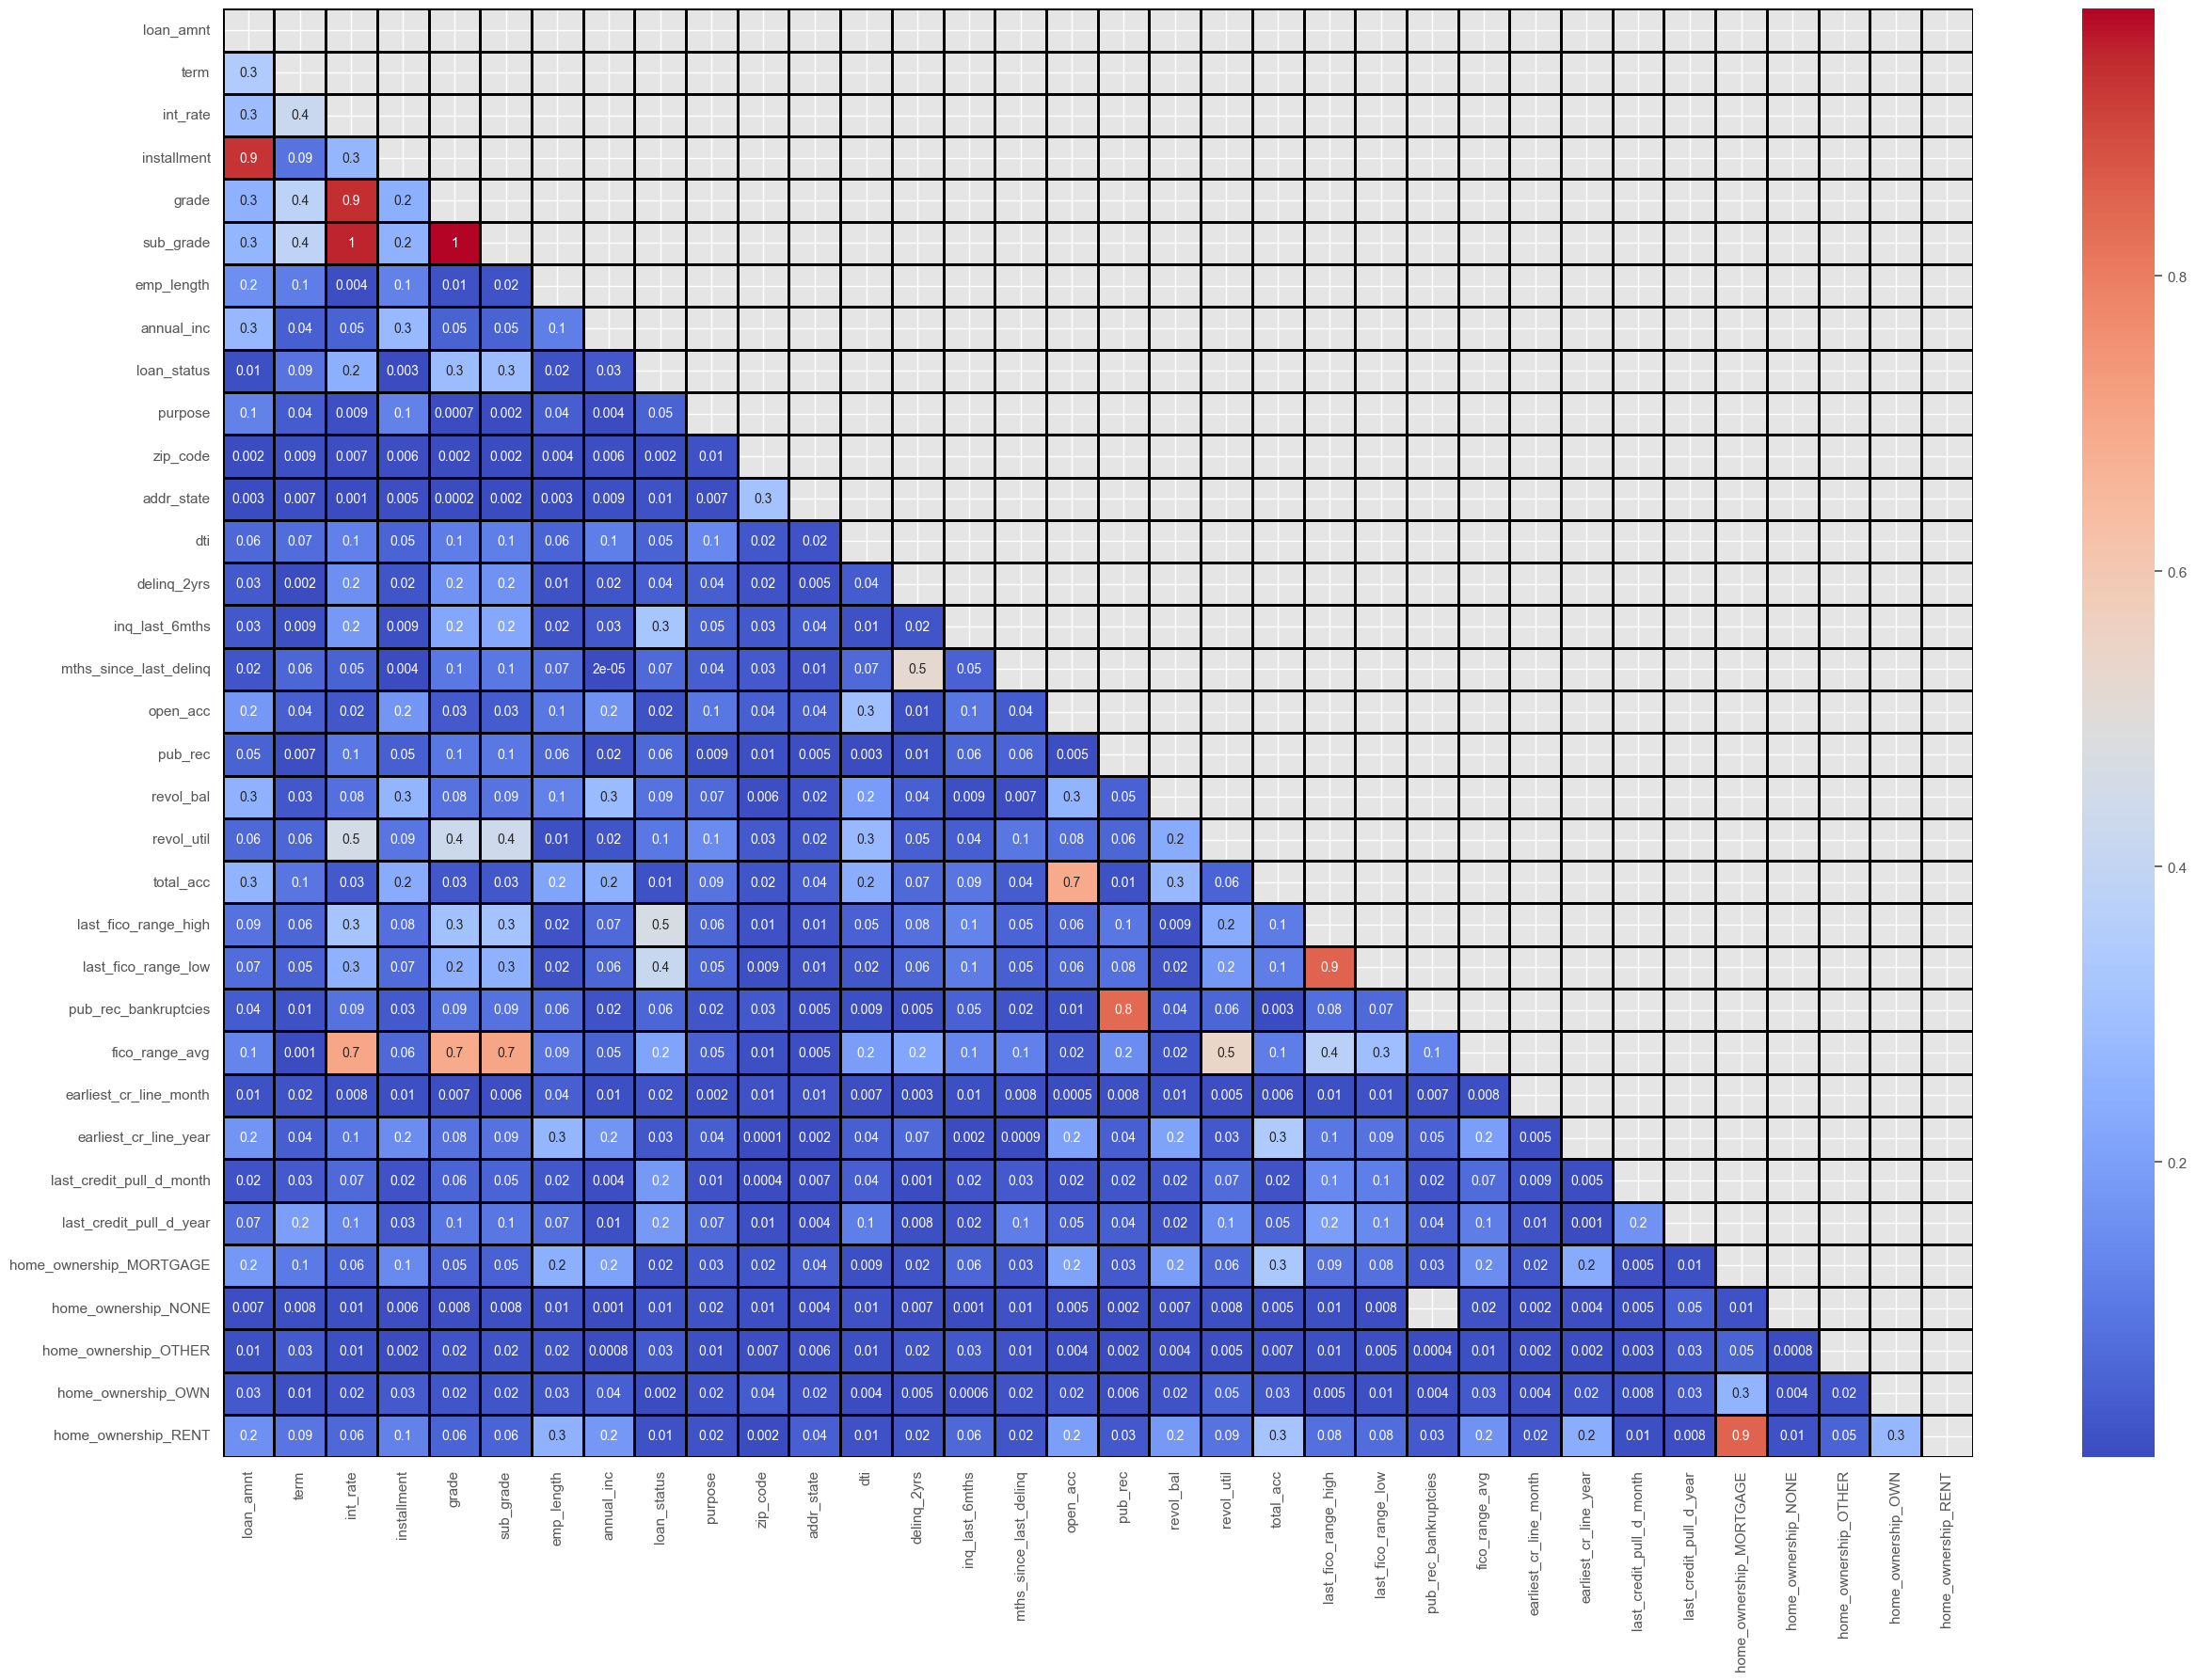

In [68]:
plt.figure(figsize=(30,20))
cor = loan_df.corr().abs()
mask = np.triu(np.ones_like(cor,dtype=bool))
sns.heatmap(cor,mask=mask, annot=True, cmap='coolwarm', fmt='.1g', linewidths=2, linecolor='black')

In [69]:
loan_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'annual_inc', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'last_fico_range_high',
       'last_fico_range_low', 'pub_rec_bankruptcies', 'fico_range_avg',
       'earliest_cr_line_month', 'earliest_cr_line_year',
       'last_credit_pull_d_month', 'last_credit_pull_d_year',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object')

In [70]:
miss_values = missing_values(loan_df)
miss_values.head()

Dataframe has 34 columns.
There are 10 columns that have missing values .


Missing Values  % of Total Values
mths_since_last_delinq           26569               63.2
pub_rec_bankruptcies              1365                3.2
emp_length                        1093                2.6
revol_util                          90                0.2
delinq_2yrs                         29                0.1

In [71]:
null_valid_cols = loan_df.isna().sum()[loan_df.isna().sum()!=0].index.to_list()

In [72]:
cat_null = [i for i in null_valid_cols if i in categorical_ls]
cat_null

['emp_length', 'revol_util']

<Axes: >

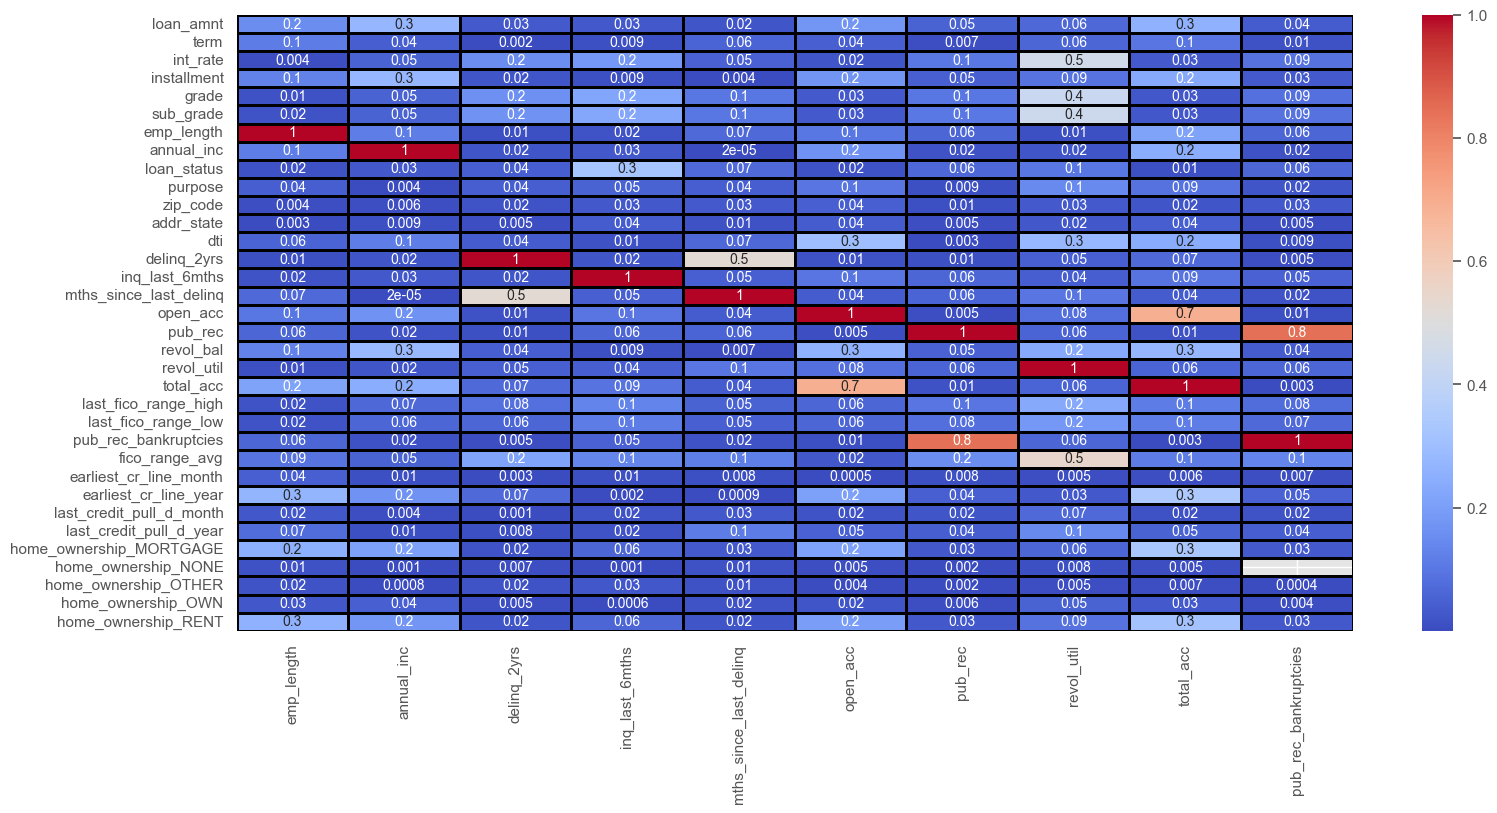

In [73]:
plt.figure(figsize=(18,8))
cor = loan_df.corr()[null_valid_cols].abs()
sns.heatmap(cor,annot=True, cmap='coolwarm', fmt='.1g', linewidths=2, linecolor='black')

In [74]:
x = loan_df.values

In [75]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')

In [76]:
x = loan_df.values
imputer.fit(x)

KNNImputer(n_neighbors=3)

In [77]:
xtrans = imputer.transform(x)

In [78]:
xtrans.shape

(42022, 34)

In [79]:
loan_df = pd.DataFrame(xtrans, columns=loan_df.columns.to_list())

In [80]:
loan_df = pd.DataFrame(xtrans, columns=loan_df.columns.to_list())
x = loan_df.drop(columns=['loan_status']).values
y = loan_df.loan_status

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

In [82]:
principalDF = pd.DataFrame(data=principalComponents,columns=['principal Component 1','principal Component 2','principal Component 3'])

In [83]:
principalDF['loan_status']=y

In [84]:
# Start Coding or Generate with Ai 
# 3rd scatterplot using plotly 
import plotly.express as px
fig = px.scatter_3d(principalDF, x='principal Component 1',y='principal Component 2',z='principal Component 3',color='loan_status',size_max=10,opacity=0.7)
fig.update_layout(margin=dict(l=0,r=0,b=0,t=0))
fig.show()

In [85]:
loan_df[cat_null] = loan_df[cat_null].round()

Data Preprocessing

In [86]:
x = loan_df.drop(columns=['loan_status'])
y = loan_df.loan_status

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=1)

In [88]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((31516, 33), (10506, 33), (31516,), (10506,))

making base line model

                                Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [90]:
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score

def Model_performance(model,X_train,X_test, y_train,y_test):
        #Train
        model.fit(X_train,y_train)
        train_class_preds =model.predict(X_train)
        print()
        train_accuracy=model.score(X_train,y_train)
        precision_train=metrics.precision_score(y_train,train_class_preds)
        recall_train=metrics.recall_score(y_train,train_class_preds)
        f1_train=metrics.f1_score(y_train,train_class_preds)
        fp_train, tp_train, th_train = metrics.roc_curve(y_train,train_class_preds)
        auc_train=metrics.auc(fp_train, tp_train)
        classification_report_train=classification_report(y_train,train_class_preds)
        cm_train = confusion_matrix(y_train, train_class_preds)

        #Test
        test_class_preds = model.predict(X_test)
        test_accuracy=model.score(X_test,y_test)
        precision_test=metrics.precision_score(y_test,test_class_preds)
        recall_test=metrics.recall_score(y_test,test_class_preds)
        f1_test=metrics.f1_score(y_test,test_class_preds)
        fp, tp, th = metrics.roc_curve(y_test, test_class_preds)
        auc_test=metrics.auc(fp, tp)
        classification_report_test=classification_report(y_test,test_class_preds)
        cm_test = confusion_matrix(y_test,test_class_preds)
        evaluation={'test_accuracy':test_accuracy,'recall_test':recall_test,'precision_test':precision_test,
                     'f1_test':f1_test,'auc_test':auc_test,"cm_test":cm_test,'train_accuracy':train_accuracy,
                     'precision_train':precision_train,'recall_train':recall_train,'f1_train':f1_train,
                    'auc_train':auc_train,'cm_train':cm_train}
        return evaluation

In [91]:
logistic_met = Model_performance(lr, x_train, x_test, y_train, y_test)
print(logistic_met)


{'test_accuracy': 0.8319055777650867, 'recall_test': 0.3304802662862577, 'precision_test': 0.6600189933523267, 'f1_test': 0.4404309252217998, 'auc_test': 0.6439382171607415, 'cm_test': array([[8045,  358],
       [1408,  695]], dtype=int64), 'train_accuracy': 0.8311651224774718, 'precision_train': 0.6624919717405267, 'recall_train': 0.3257539870519501, 'f1_train': 0.4367524081719064, 'auc_train': 0.6420097418085466, 'cm_train': array([[24132,  1051],
       [ 4270,  2063]], dtype=int64)}


In [92]:
Eval_df = pd.DataFrame.from_dict(logistic_met, orient='index', columns=['Logistic Regression'])
Eval_df

Logistic Regression
test_accuracy                         0.831906
recall_test                            0.33048
precision_test                        0.660019
f1_test                               0.440431
auc_test                              0.643938
cm_test             [[8045, 358], [1408, 695]]
train_accuracy                        0.831165
precision_train                       0.662492
recall_train                          0.325754
f1_train                              0.436752
auc_train                              0.64201
cm_train         [[24132, 1051], [4270, 2063]]

<Axes: >

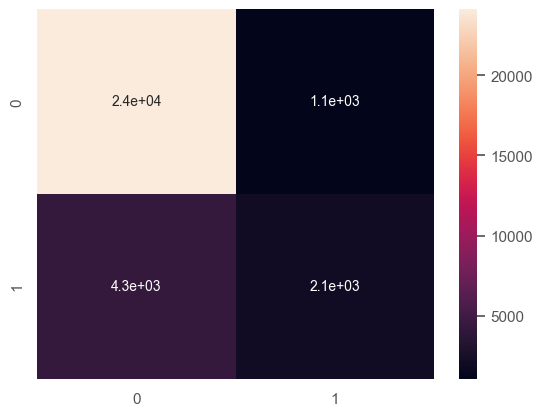

In [93]:
sns.heatmap(Eval_df['Logistic Regression']['cm_train'], annot=True)

                                Support Vector Machine                                  

In [94]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [95]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

In [98]:
Svm_eval = Model_performance(svc_model, x_train, x_test, y_train, y_test)

In [99]:
sv_df = pd.DataFrame.from_dict(Svm_eval, orient='index', columns=['SVMs'])
sv_df 

SVMs
test_accuracy                        0.868361
recall_test                          0.903947
precision_test                       0.616807
f1_test                              0.733269
auc_test                             0.881701
cm_test           [[7222, 1181], [202, 1901]]
train_accuracy                       0.890976
precision_train                       0.65979
recall_train                         0.944418
f1_train                             0.776854
auc_train                            0.910977
cm_train         [[22099, 3084], [352, 5981]]

                            Baseline Models

In [100]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [101]:
# fit predictor and target variable
x_smote,y_smote  = smote.fit_resample(x_train, y_train)
x_smote=pd.DataFrame(x_smote,columns=loan_df.drop('loan_status',axis=1).columns.to_list())
y_smote=pd.Series(y_smote)

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve,confusion_matrix,auc,r2_score,f1_score

In [103]:
#declare the models
lr_model=LogisticRegression(C=0.01,penalty='l1',max_iter=200,solver='liblinear')
dt_model=DecisionTreeClassifier()
rf_model=RandomForestClassifier()
gbc_model=GradientBoostingClassifier()
xgb_model=XGBClassifier()
knn_model = KNeighborsClassifier()
svm_model = SVC()

#create a list of models
models=[lr_model,dt_model,rf_model,gbc_model,xgb_model,knn_model,svm_model]

#creating dictionay for storing the confustion matix
dct_train={}
dct_test={}
lst_imp=[]

# fuction for calculation the eveluation matrix
def score_model(x_train,y_train,x_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    
    #read model one by one
    for model in models:
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        y_pred_train=model.predict(x_train)

        #compute metrics
        train_accuracy=accuracy_score(y_train,y_pred_train)
        test_accuracy=accuracy_score(y_test,y_pred)
        p_score_train=precision_score(y_train,y_pred_train)
        p_score=precision_score(y_test,y_pred)
        r_score_train=recall_score(y_train,y_pred_train)
        r_score=recall_score(y_test,y_pred)
        train_auc = roc_auc_score(y_train,y_pred_train)
        test_auc = roc_auc_score(y_test,y_pred)
        fp, tp, th = roc_curve(y_test, y_pred)
        fptrain, tptrain, th_train = roc_curve(y_train, y_pred_train)

        #insert in dataframe
        df.loc[i,"Model Name"]=model.__class__.__name__
        df.loc[i,"Train Accuracy"]=round(train_accuracy,2)
        df.loc[i,"Test Accuracy"]=round(test_accuracy,2)
        df.loc[i,"Precision Train"]=round(p_score_train,2)
        df.loc[i,"Precision Test"]=round(p_score,2)
        df.loc[i,"Recall Train"]=round(r_score_train,2)
        df.loc[i,"Recall test"]=round(r_score,2)
        df.loc[i,"ROC AUC Train"]=round(train_auc,2)
        df.loc[i,"ROC AUC Test"]=round(test_auc,2)
        df.loc[i,'AUC Train'] = auc(fptrain, tptrain)
        df.loc[i,'AUC Test'] = auc(fp, tp)
        #inserted in dictionary
        dct_train[model.__class__.__name__]=confusion_matrix(y_train,y_pred_train)
        dct_test[model.__class__.__name__]=confusion_matrix(y_test,y_pred)

        i+=1
    # Return the data frame and dictionary
    return df,dct_train,dct_test

In [104]:
result_df, dct_train, dct_test = score_model(x_smote, y_smote, x_test, y_test)

In [105]:
# Evaluation Matrix
result_df

Model Name  Train Accuracy  Test Accuracy  Precision Train  \
0          LogisticRegression            0.84           0.83             0.83   
1      DecisionTreeClassifier            1.00           0.65             1.00   
2      RandomForestClassifier            1.00           0.82             1.00   
3  GradientBoostingClassifier            0.93           0.67             0.92   
4               XGBClassifier            0.98           0.44             0.97   
5        KNeighborsClassifier            0.91           0.78             0.86   
6                         SVC            0.93           0.87             0.90   

   Precision Test  Recall Train  Recall test  ROC AUC Train  ROC AUC Test  \
0            0.54          0.85         0.84           0.84          0.83   
1            0.36          1.00         0.89           1.00          0.74   
2            0.53          1.00         0.94           1.00          0.86   
3            0.38          0.95         0.97           0.93          0.78   
4            0.26          0.98         1.00           0.98          0.65   
5            0.48          0.99         0.82           0.91          0.80   
6            0.64          0.96         0.87           0.93          0.87   

   AUC Train  AUC Test  
0   0.837887  0.829197  
1   1.000000  0.743899  
2   1.000000  0.864544  
3   0.934301  0.783485  
4   0.976532  0.649175  
5   0.913116  0.798203  
6   0.926101  0.872496

Confusion Matrix For Test Data.

In [106]:
for key,value in dct_test.items():
  print(f'For {key} Confusion matrix is :')
  print(value)

For LogisticRegression Confusion matrix is :
[[6915 1488]
 [ 346 1757]]
For DecisionTreeClassifier Confusion matrix is :
[[4994 3409]
 [ 224 1879]]
For RandomForestClassifier Confusion matrix is :
[[6614 1789]
 [ 122 1981]]
For GradientBoostingClassifier Confusion matrix is :
[[5000 3403]
 [  59 2044]]
For XGBClassifier Confusion matrix is :
[[2543 5860]
 [   9 2094]]
For KNeighborsClassifier Confusion matrix is :
[[6506 1897]
 [ 374 1729]]
For SVC Confusion matrix is :
[[7355 1048]
 [ 274 1829]]


Heatmap Of Confusion Matrix For Test Data

For LogisticRegression Confusion matrix HeatMap is :


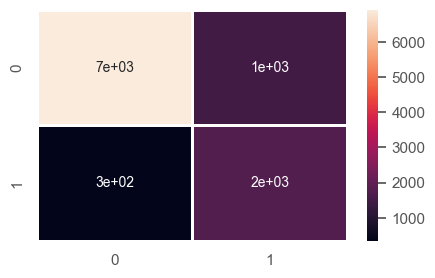

For DecisionTreeClassifier Confusion matrix HeatMap is :


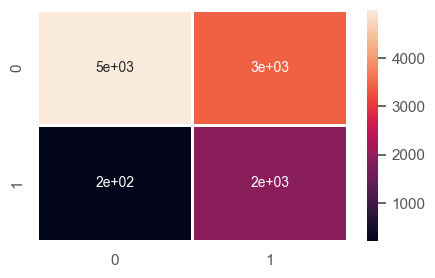

For RandomForestClassifier Confusion matrix HeatMap is :


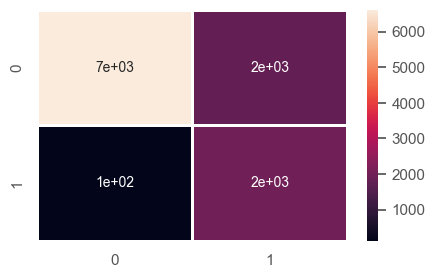

For GradientBoostingClassifier Confusion matrix HeatMap is :


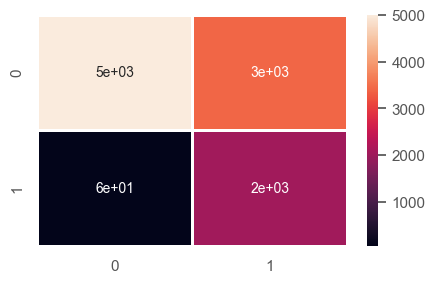

For XGBClassifier Confusion matrix HeatMap is :


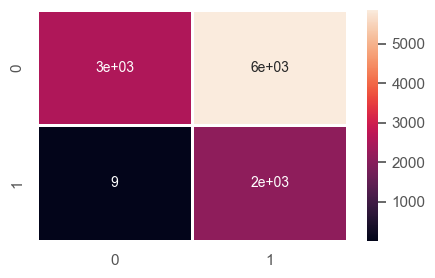

For KNeighborsClassifier Confusion matrix HeatMap is :


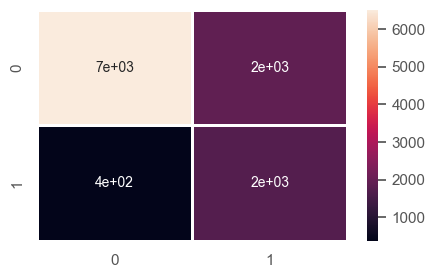

For SVC Confusion matrix HeatMap is :


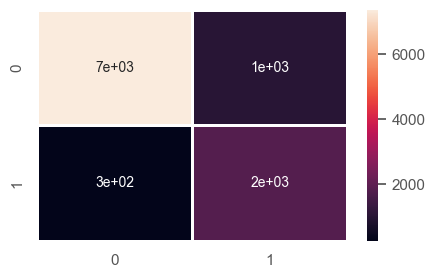

In [107]:
for key,value in dct_test.items():
  print(f'For {key} Confusion matrix HeatMap is :')
  plt.figure(figsize=(5,3))
  sns.heatmap(data=value,annot=True,fmt='.1g' ,linewidths=2)
  plt.show()

Confusion Matrix For Train Data

In [108]:
for key,value in dct_train.items():
  print(f'For {key} Confusion matrix is :')
  print(value)

For LogisticRegression Confusion matrix is :
[[20793  4390]
 [ 3775 21408]]
For DecisionTreeClassifier Confusion matrix is :
[[25183     0]
 [    0 25183]]
For RandomForestClassifier Confusion matrix is :
[[25183     0]
 [    0 25183]]
For GradientBoostingClassifier Confusion matrix is :
[[23202  1981]
 [ 1328 23855]]
For XGBClassifier Confusion matrix is :
[[24506   677]
 [  505 24678]]
For KNeighborsClassifier Confusion matrix is :
[[20934  4249]
 [  127 25056]]
For SVC Confusion matrix is :
[[22529  2654]
 [ 1068 24115]]


Heatmap Of Confusion Matrix For Train Data

For LogisticRegression Confusion matrix HeatMap is :


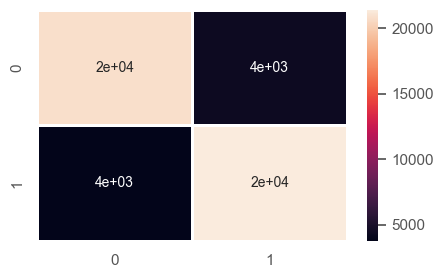

For DecisionTreeClassifier Confusion matrix HeatMap is :


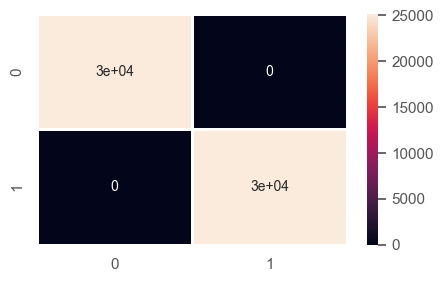

For RandomForestClassifier Confusion matrix HeatMap is :


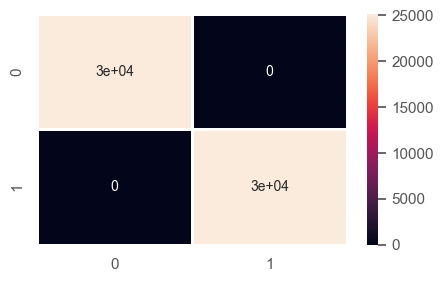

For GradientBoostingClassifier Confusion matrix HeatMap is :


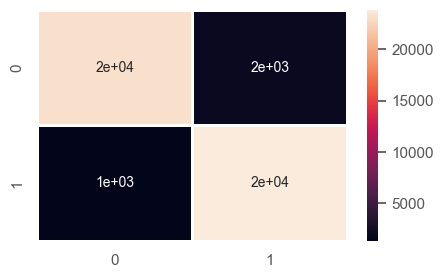

For XGBClassifier Confusion matrix HeatMap is :


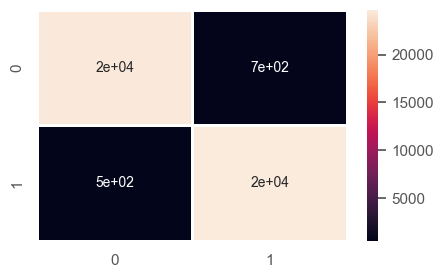

For KNeighborsClassifier Confusion matrix HeatMap is :


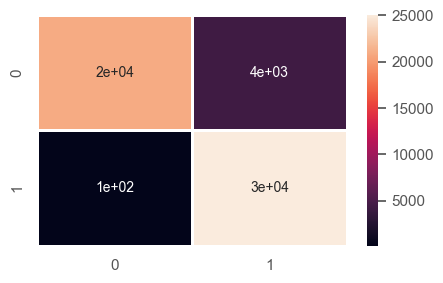

For SVC Confusion matrix HeatMap is :


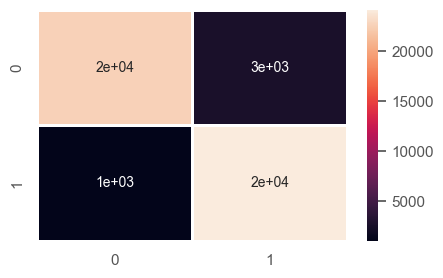

In [109]:
for key,value in dct_train.items():
  print(f'For {key} Confusion matrix HeatMap is :')
  plt.figure(figsize=(5,3))
  sns.heatmap(data=value,annot=True,fmt='.1g' ,linewidths=2)
  plt.show()

Random Forest, Gradient Boosting and XGB classifier give more than 80% precision and recall

Random forest gives highest precision of 100% but 77% train accuracy which could be clear case of overfitting(For learning purpose we will try to hypertune the Random forest parameters)

Gradient Boosting gives precision of 95% but 84% train accuracy which is good for our predictiopn.

Choosing the models

We are aiming for precision and want to make sure business identifies the right people to give Loan.Random forest performance is stable but it overfits(can be controlled by hyper parameter tuning)

XGBoost and Gradientboosting perform simple interms of F1_score,P & R and consitently perform similar independent of sampling method. Three models :

1-Gradientboosting

2-Random Forest for learning purpose and avoiding overfitting

3-XGBClassifier

Gradient Boosting Classifier

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=1)

In [111]:
# Applying gridsearch cv
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,n_estimators=60, max_features='sqrt', 
                                                              subsample=0.8, random_state=10),
                                                              param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
#iid=False

In [112]:
gsearch_met=Model_performance(gsearch,x_train,x_test, y_train,y_test)
print(gsearch_met)


{'test_accuracy': 0.9682017534552368, 'recall_test': 0.809320019020447, 'precision_test': 0.8147438966012446, 'f1_test': 0.8120229007633588, 'auc_test': 0.8816325193281457, 'cm_test': array([[8016,  387],
       [ 401, 1702]], dtype=int64), 'train_accuracy': 0.990559381656607, 'precision_train': 0.8951358180669615, 'recall_train': 0.8949944733933365, 'f1_train': 0.8950651401500197, 'auc_train': 0.9343137398932692, 'cm_train': array([[24519,   664],
       [  665,  5668]], dtype=int64)}


In [113]:
# Printing eveluation metrics
gsearch_met_df=pd.DataFrame.from_dict(gsearch_met, orient='index',columns=['Grad_Boost'])
gsearch_met_df

Grad_Boost
test_accuracy                       0.968202
recall_test                          0.80932
precision_test                      0.814744
f1_test                             0.812023
auc_test                            0.881633
cm_test           [[8016, 387], [401, 1702]]
train_accuracy                      0.990559
precision_train                     0.895136
recall_train                        0.894994
f1_train                            0.895065
auc_train                           0.934314
cm_train         [[24519, 664], [665, 5668]]

<Axes: title={'center': 'Confusion Matrix TEsting'}>

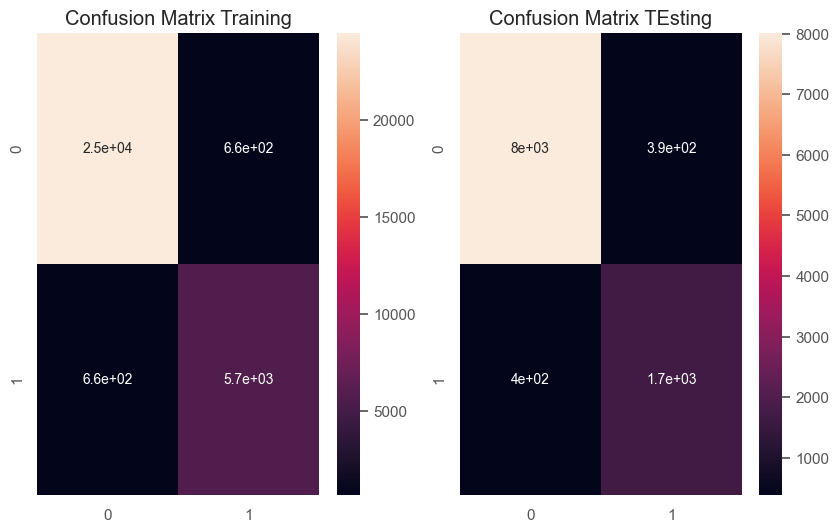

In [114]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].set_title("Confusion Matrix Training")
sns.heatmap(gsearch_met_df['Grad_Boost']['cm_train'],annot=True,ax=axs[0])
axs[1].set_title("Confusion Matrix TEsting")
sns.heatmap(gsearch_met_df['Grad_Boost']['cm_test'],annot=True,ax=axs[1])

The accuracy came out to be satisfactory for the baseline along with the recall score. However, precision seems to be very good but we can see it predict around 200 defaulter as eligeble for loan which we want to reduce so let's use some another techneque.

For our case, overfitting will be a huge concern. So, I'm using Random Forest as it is known to decrease overfitting by selecting features at random.

Random Forest Classifier

In [115]:
from sklearn.metrics import roc_curve, precision_recall_curve

In [116]:
from sklearn.metrics import classification_report

In [117]:
n_estimators = [100, 30, 50, 800, 120]
max_depth = [5, 8, 15, 25]
min_samples_split = [20,10,  15, 100]
min_samples_leaf = [ 2, 5, 10]
forest = RandomForestClassifier(random_state = 1)
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split,
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1,
                      n_jobs = -1)
RandomForest_Eval = gridF.fit(x_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


In [118]:
RForest_Eval=RandomForest_Eval.best_estimator_
RForest_Eval

RandomForestClassifier(max_depth=25, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=800, random_state=1)

In [119]:
y_pred=RForest_Eval.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[8002  401]
 [ 408 1695]]
Accuracy Score 0.9229963830192272
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      8403
         1.0       0.81      0.81      0.81      2103

    accuracy                           0.92     10506
   macro avg       0.88      0.88      0.88     10506
weighted avg       0.92      0.92      0.92     10506



We have high precision high recall for our validation set. But still it predict 309 defaulter as eligeble.

it can be useful if we can ignore little bit loss among dfaulter .

let's try XG Boost .

XG Boost Classifier

In [120]:
from sklearn.model_selection import RandomizedSearchCV
xgb= XGBClassifier(scale_pos_weight=90,
    objective = 'binary:logistic',
    nthread=4,
    eta = 0.1,
    num_boost_round = 80,
    max_depth = 5,
    subsample = 0.5,
    colsample_bytree = 1.0,
    silent = 1,
    )

parameters = {
    'weights' :[ 99, 75, ],
    'num_boost_round': [10, 25,],
    'eta': [0.05, 0.1, 0.3],
    'max_depth': [3, 4, 5],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
}


# define grid search
grid = RandomizedSearchCV(xgb, parameters, cv=2, scoring='roc_auc')

In [121]:
XgbEval = grid.fit(x_train, y_train)

In [122]:
best_prams = XgbEval.best_estimator_
best_prams

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, nthread=4, ...)

In [123]:
y_pred=best_prams.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[5672 2731]
 [  24 2079]]
Accuracy Score 0.7377688939653532
              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80      8403
         1.0       0.43      0.99      0.60      2103

    accuracy                           0.74     10506
   macro avg       0.71      0.83      0.70     10506
weighted avg       0.88      0.74      0.76     10506



99.99% of the bad loans were identified by the model.

Precision - Recall Curve

In [124]:
from sklearn.metrics import precision_recall_curve
y_scores = best_prams.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

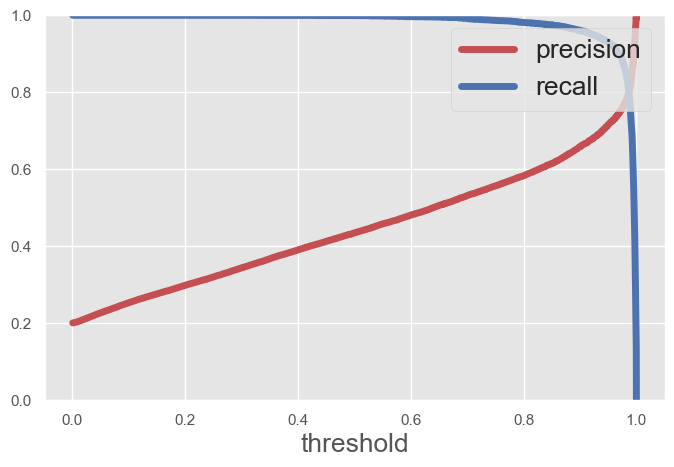

In [125]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 5))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

ROC_CURVE

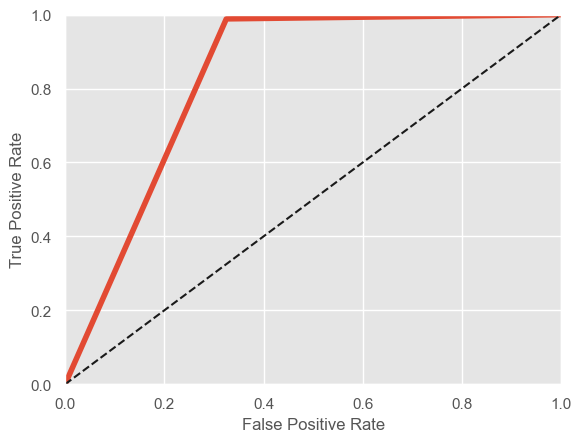

In [126]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=4,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()

Feature Importance Graph

In [127]:
features = x.columns
importances = best_prams.feature_importances_
indices = np.argsort(importances)

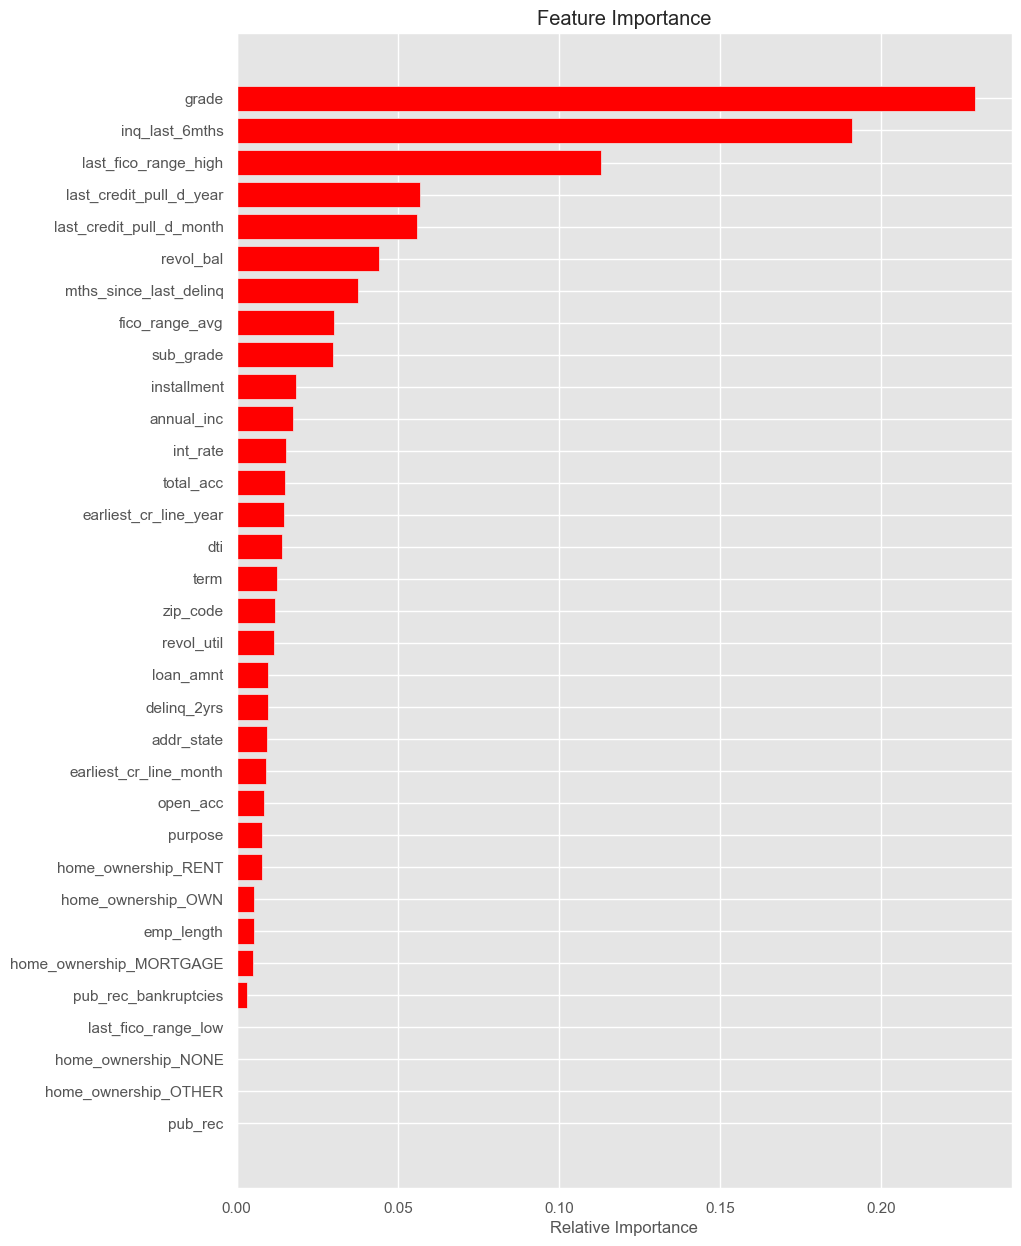

In [128]:
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [129]:
import pickle
with open('loan_defaulter_xgb_model.pickel','wb') as f:
    pickle.dump(xgb_model,f)

In [130]:
import pickle
with open('loan_defaulter_RF_model.pickel','wb') as f:
    pickle.dump(rf_model,f)

In [131]:
# import json
# columns = {
#     'data_columns' : [col.lower() for col in loan_df.columns]
# }
# with open("Columns.json",'w') as f:
#     f.write(json.dumps(column))